In [4]:
audit='final_data.csv'

import pandas as pd
import numpy as np

#from pandas import DataFrame as df

audit_df=pd.read_csv(audit)

audit_df.head()

,SECTOR_SCORE,LOCATION_ID,PARA_A,SCORE_A,RISK_A,PARA_B,SCORE_B,RISK_B,TOTAL,NUMBERS,...,SCORE,INHERENT_RISK,CONTROL_RISK,DETECTION_RISK,AUDIT_RISK,RISK_x,MARKS,MONEY_MARKS,LOSS,RISK_y
0,3.89,23,4.18,6.0,2.508,2.50,2.0,0.500,6.68,5.0,...,2.4,8.574,0.4,0.5,1.7148,1,2,2,0,1
1,3.89,6,0.00,2.0,0.000,4.83,2.0,0.966,4.83,5.0,...,2.0,2.554,0.4,0.5,0.5108,0,2,2,0,0
2,3.89,6,0.51,2.0,0.102,0.23,2.0,0.046,0.74,5.0,...,2.0,1.548,0.4,0.5,0.3096,0,2,2,0,0
3,3.89,6,0.00,2.0,0.000,10.80,6.0,6.480,10.80,6.0,...,4.4,17.530,0.4,0.5,3.5060,1,6,6,0,1
4,3.89,6,0.00,2.0,0.000,0.08,2.0,0.016,0.08,5.0,...,2.0,1.416,0.4,0.5,0.2832,0,2,2,0,0


In [5]:
audit_df.dtypes

SECTOR_SCORE      float64
LOCATION_ID         int64
PARA_A            float64
SCORE_A           float64
RISK_A            float64
PARA_B            float64
SCORE_B           float64
RISK_B            float64
TOTAL             float64
NUMBERS           float64
SCORE_C           float64
RISK_C            float64
MONEY_VALUE       float64
SCORE_MV          float64
RISK_D            float64
DISTRICT_LOSS       int64
PROB              float64
RISK_E            float64
HISTORY             int64
PROB_EXTRA        float64
RISK_F            float64
SCORE             float64
INHERENT_RISK     float64
CONTROL_RISK      float64
DETECTION_RISK    float64
AUDIT_RISK        float64
RISK_x              int64
MARKS               int64
MONEY_MARKS         int64
LOSS                int64
RISK_y              int64
dtype: object

In [6]:
#importing Libraries

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1
import mglearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.utils import shuffle
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
import numpy

Using TensorFlow backend.


In [7]:
audit_df.shape

(810, 31)

# Data Preparation for Regession


In [8]:
# creating X and Y datasets

X = audit_df.drop(['AUDIT_RISK','RISK_y','RISK_x'], axis=1)
X.head()

,SECTOR_SCORE,LOCATION_ID,PARA_A,SCORE_A,RISK_A,PARA_B,SCORE_B,RISK_B,TOTAL,NUMBERS,...,HISTORY,PROB_EXTRA,RISK_F,SCORE,INHERENT_RISK,CONTROL_RISK,DETECTION_RISK,MARKS,MONEY_MARKS,LOSS
0,3.89,23,4.18,6.0,2.508,2.50,2.0,0.500,6.68,5.0,...,0,0.2,0.0,2.4,8.574,0.4,0.5,2,2,0
1,3.89,6,0.00,2.0,0.000,4.83,2.0,0.966,4.83,5.0,...,0,0.2,0.0,2.0,2.554,0.4,0.5,2,2,0
2,3.89,6,0.51,2.0,0.102,0.23,2.0,0.046,0.74,5.0,...,0,0.2,0.0,2.0,1.548,0.4,0.5,2,2,0
3,3.89,6,0.00,2.0,0.000,10.80,6.0,6.480,10.80,6.0,...,0,0.2,0.0,4.4,17.530,0.4,0.5,6,6,0
4,3.89,6,0.00,2.0,0.000,0.08,2.0,0.016,0.08,5.0,...,0,0.2,0.0,2.0,1.416,0.4,0.5,2,2,0


In [9]:
y=audit_df['AUDIT_RISK']
y.head()

0    1.7148
1    0.5108
2    0.3096
3    3.5060
4    0.2832
Name: AUDIT_RISK, dtype: float64

### Splitting data into train and test

In [10]:
from sklearn.model_selection import train_test_split

X_train_org , X_test_org, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 0)
#scale 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
#X_train = scaler.fit_transform(X_train_org)
scaler.fit(X_train_org)
X_train = scaler.transform(X_train_org)
X_test = scaler.transform(X_test_org)

C:\Users\Nikhil Patil\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [11]:
lasso_reg = Lasso()

knn_reg = KNeighborsRegressor(5)

ridge_reg = Ridge()

linearSVR_reg = LinearSVR()

### Bagging with Lasso and KNN Regressor

In [10]:
#Bagging 1
bag_reg_1 = BaggingRegressor(lasso_reg, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)
bag_reg_1.fit(X_train,y_train)
print("Lasso Regression Bagging score {:.2f}".format(bag_reg_1.score(X_test,y_test)))


#Bagging 2
bag_reg_2 = BaggingRegressor(knn_reg, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)
bag_reg_2.fit(X_train,y_train)
print("K Nearest Neighbor Regression Bagging score {:.2f}".format(bag_reg_2.score(X_test,y_test)))

Lasso Regression Bagging score 0.61
K Nearest Neighbor Regression Bagging score 0.40


### Pasting with Lasso and KNN Regressor

In [11]:
#Pasting 1
pas_reg_1 = BaggingRegressor(ridge_reg, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)
pas_reg_1.fit(X_train,np.ravel(y_train,order='C'))
print("Ridge Regression pasting score {:.2f}".format(pas_reg_1.score(X_test,y_test)))


#Pasting 2
pas_reg_2 = BaggingRegressor(linearSVR_reg, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)
pas_reg_2.fit(X_train,np.ravel(y_train,order='C'))
print("LinearSVR regression Regression pasting score {:.2f}".format(pas_reg_2.score(X_test,y_test)))

Ridge Regression pasting score 0.71
LinearSVR regression Regression pasting score 0.57


### Adaboost

``Adaboosing1 : Adaboost with Lasso Regressor``


``Adaboosing2 : Adaboost with KNN Regressor``

In [12]:
#Adaboosting 1
ada_reg_1 = AdaBoostRegressor(lasso_reg, n_estimators=200, learning_rate=0.5, random_state=0)
ada_reg_1.fit(X_train, np.ravel(y_train,order='C'))
print("Ridge Regression score in Adaboost {:.2f}".format(ada_reg_1.score(X_test,y_test)))

#Adaboosing 2
ada_reg_2 = AdaBoostRegressor(knn_reg, n_estimators=200, learning_rate=0.5, random_state=0)
ada_reg_2.fit(X_train, np.ravel(y_train,order='C'))
print("K Nearest Neighbor Regression score in Adaboost {:.2f}".format(ada_reg_2.score(X_test,y_test)))

Ridge Regression score in Adaboost 0.02
K Nearest Neighbor Regression score in Adaboost 0.24


### Gradient Boost

In [13]:
gbrt = GradientBoostingRegressor(max_depth=4, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X_train,y_train)
print("Gradient Boosting Regression Trees Test score {:.2f}".format(gbrt.score(X_test,y_test)))

Gradient Boosting Regression Trees Test score 0.87


### Principal Component Analysis

In [14]:
pca = PCA()  
X_train_pca = pca.fit_transform(X_train)  
X_test_pca = pca.transform(X_test)  

In [15]:
pca.n_components_

28

In [16]:
X_train_pca.shape

(729, 28)

In [17]:
pca.explained_variance_ratio_

array([4.86995526e-01, 1.25013846e-01, 9.66960319e-02, 8.58668337e-02,
       5.02807045e-02, 4.96737349e-02, 3.98029122e-02, 3.17696020e-02,
       1.43851331e-02, 9.77099647e-03, 3.92988350e-03, 3.06162417e-03,
       1.55947157e-03, 7.16960145e-04, 4.64679869e-04, 9.01986971e-06,
       2.33919501e-06, 4.00302387e-07, 2.31024428e-07, 6.15379711e-08,
       8.28442466e-09, 1.44373768e-32, 4.33558614e-33, 3.56100392e-33,
       3.56100392e-33, 3.56100392e-33, 3.56100392e-33, 3.56100392e-33])

### 0.95 explained variance

In [18]:
pca_95 = PCA(n_components=0.95)
pca_95.fit(X_train)
X_train_reduced = pca_95.transform(X_train)
X_test_reduced = pca_95.transform(X_test)

In [19]:
pca_95.n_components_

8

In [20]:
pca_95.explained_variance_

array([0.62979455, 0.16167097, 0.12504968, 0.11104509, 0.06502424,
       0.06423929, 0.0514741 , 0.04108523])

#### Scaling for PCA(100% variance)

In [21]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_pca)
X_test_scaled = scaler.transform(X_test_pca)

#### KNN Regressor Using GridSearchCV after PCA (100% variance)

In [22]:
k_range = list(range(1, 31))

param_grid_knn_reg = dict(n_neighbors=k_range)
print("Parameter grid:\n{}".format(param_grid_knn_reg))

grid_search_knn_reg_100 = GridSearchCV(KNeighborsRegressor(),param_grid_knn_reg,cv=5,return_train_score=True)
grid_search_knn_reg_100.fit(X_train_scaled, np.ravel(y_train,order='C'))
pred_grid_search=grid_search_knn_reg_100.predict(X_test_scaled)

print("Best parameters: {}".format(grid_search_knn_reg_100.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_knn_reg_100.best_score_))
#print("Best Estimator:".format(grid_search_knn_reg_100.best_estimator_))
print("Training Score: {:.2f}".format((grid_search_knn_reg_100.score(X_train_scaled, y_train))))
print("Testing Score: {:.2f}".format((grid_search_knn_reg_100.score(X_test_scaled, y_test))))
print("Best Estimator: {}".format(grid_search_knn_reg_100.best_estimator_))

Parameter grid:
{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}
Best parameters: {'n_neighbors': 6}
Best cross-validation score: 0.43
Training Score: 0.47
Testing Score: 0.30
Best Estimator: KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=6, p=2,
          weights='uniform')


In [23]:
knn_reg_best_param = format(grid_search_knn_reg_100.best_params_)
knn_reg_cv_score = round(grid_search_knn_reg_100.best_score_,2)
knn_reg_train_score = round((grid_search_knn_reg_100.score(X_train_scaled, y_train)),2)
knn_reg_test_score= round((grid_search_knn_reg_100.score(X_test_scaled, y_test)),2)

Text(0,0.5,'r2 Score')

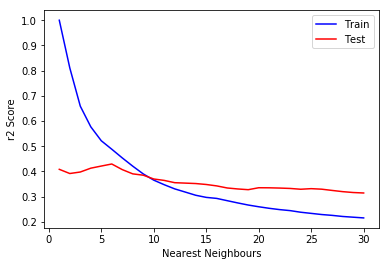

In [24]:
plt.plot(param_grid_knn_reg['n_neighbors'], grid_search_knn_reg_100.cv_results_['mean_train_score'], 'b-', label="Train")
plt.plot(param_grid_knn_reg['n_neighbors'], grid_search_knn_reg_100.cv_results_['mean_test_score'],'r-', label="Test")
plt.legend(loc='upper right')
plt.xlabel('Nearest Neighbours')
plt.ylabel('r2 Score')

In [25]:
f = open('result-audit_PCA_Regression.csv','w')
line = 'Model name, Best Parameters, Train Score, Test Score,  Best Cross Validation score\n'
f.write(line)
f.close()

In [26]:
f = open('result-audit_PCA_Regression.csv','a')
line = 'KNN_PCA,' + str(knn_reg_best_param)+ ',' + str(knn_reg_train_score) + ',' + str(knn_reg_test_score)+ ',' + str(knn_reg_cv_score) +'\n' 
f.write(line)
f.close()

#### Scaling for PCA(95% variance)

In [27]:
scaler = MinMaxScaler()
X_train_scaled_95 = scaler.fit_transform(X_train_reduced)
X_test_scaled_95 = scaler.transform(X_test_reduced)


#### KNN Using GridSearchCV after PCA (95% variance)

In [28]:
k_range = list(range(1, 31))

param_grid_knn_reg = dict(n_neighbors=k_range)
print("Parameter grid:\n{}".format(param_grid_knn_reg))

grid_search_knn_reg_95 = GridSearchCV(KNeighborsRegressor(),param_grid_knn_reg,cv=5,return_train_score=True)
grid_search_knn_reg_95.fit(X_train_scaled_95, np.ravel(y_train,order='C'))
pred_grid_search=grid_search_knn_reg_95.predict(X_test_scaled_95)

print("Best parameters: {}".format(grid_search_knn_reg_95.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_knn_reg_95.best_score_))
print("Best Estimator:".format(grid_search_knn_reg_95.best_estimator_))
print("Training Score: {:.2f}".format((grid_search_knn_reg_95.score(X_train_scaled_95, y_train))))
print("Testing Score: {:.2f}".format((grid_search_knn_reg_95.score(X_test_scaled_95, y_test))))
print("Best estimator: {}".format(grid_search_knn_reg_95.best_estimator_))

Parameter grid:
{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}
Best parameters: {'n_neighbors': 19}
Best cross-validation score: 0.46
Best Estimator:
Training Score: 0.28
Testing Score: 0.34
Best estimator: KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=19, p=2,
          weights='uniform')


Text(0,0.5,'r2 Score')

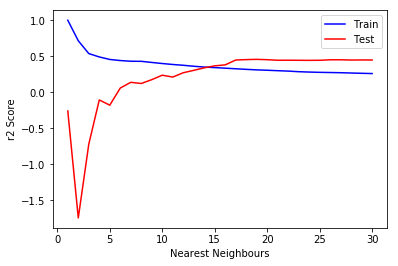

In [29]:
plt.plot(param_grid_knn_reg['n_neighbors'], grid_search_knn_reg_95.cv_results_['mean_train_score'], 'b-', label="Train")
plt.plot(param_grid_knn_reg['n_neighbors'], grid_search_knn_reg_95.cv_results_['mean_test_score'],'r-', label="Test")
plt.legend(loc='upper right')
plt.xlabel('Nearest Neighbours')
plt.ylabel('r2 Score')

In [30]:
knn_reg_best_param_95 = format(grid_search_knn_reg_95.best_params_)
knn_reg_cv_score_95 = round(grid_search_knn_reg_95.best_score_,2)
knn_reg_train_score_95 = round((grid_search_knn_reg_95.score(X_train_scaled_95, y_train)),2)
knn_reg_test_score_95= round((grid_search_knn_reg_95.score(X_test_scaled_95, y_test)),2)

In [32]:
f = open('result-audit_PCA_Regression.csv','a')
line = 'KNN_PCA_95,' + str(knn_reg_best_param_95) + ' ,' + str(knn_reg_train_score_95) + ',' + str(knn_reg_test_score_95) + ',' + str(knn_reg_cv_score_95) +'\n' 
f.write(line)
f.close()

#### Ridge Regression using GridSearchCV after PCA (100% variance)

In [33]:
param_grid_ridge_reg = {
              'alpha': [0.001, 0.01, 0.1, 1, 10]}

print("Parameter grid:\n{}".format(param_grid_ridge_reg))

grid_search_ridge_reg_100 = GridSearchCV(Ridge(),param_grid_ridge_reg,cv=5,return_train_score=True)
grid_search_ridge_reg_100.fit(X_train_scaled, np.ravel(y_train,order='C'))
pred_grid_search=grid_search_ridge_reg_100.predict(X_test_scaled)

print("Best parameters: {}".format(grid_search_ridge_reg_100.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_ridge_reg_100.best_score_))
print("Best Estimator:".format(grid_search_ridge_reg_100.best_estimator_))
print("Training Score: {:.2f}".format((grid_search_ridge_reg_100.score(X_train_scaled, y_train))))
print("Testing Score: {:.2f}".format((grid_search_ridge_reg_100.score(X_test_scaled, y_test))))
print("Best estimator: {}".format(grid_search_ridge_reg_100.best_estimator_))


Parameter grid:
{'alpha': [0.001, 0.01, 0.1, 1, 10]}
Best parameters: {'alpha': 1}
Best cross-validation score: 0.47
Best Estimator:
Training Score: 0.76
Testing Score: 0.60
Best estimator: Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


In [34]:
ridge_reg_100_best_param = format(grid_search_ridge_reg_100.best_params_)
ridge_reg_100_cv_score = round(grid_search_ridge_reg_100.best_score_,2 )
ridge_reg_100_train_score = round((grid_search_ridge_reg_100.score(X_train_scaled, y_train)),2)
ridge_reg_100_test_score= round((grid_search_ridge_reg_100.score(X_test_scaled, y_test)),2)

In [35]:
f = open('result-audit_PCA_Regression.csv','a')
line = 'Ridge_PCA,' + str(ridge_reg_100_best_param) + ' ,' + str(ridge_reg_100_train_score) + ',' + str(ridge_reg_100_test_score) + ',' + str(ridge_reg_100_cv_score) +'\n' 
f.write(line)
f.close()

#### Ridge Regression using GridSearchCV after PCA (95% variance)

In [36]:
param_grid_ridge_reg = {
              'alpha': [0.001, 0.01, 0.1, 1, 10]}

print("Parameter grid:\n{}".format(param_grid_ridge_reg))

grid_search_ridge_reg_95 = GridSearchCV(Ridge(),param_grid_ridge_reg,cv=5,return_train_score=True)
grid_search_ridge_reg_95.fit(X_train_scaled_95, np.ravel(y_train,order='C'))
pred_grid_search=grid_search_ridge_reg_95.predict(X_test_scaled_95)

print("Best parameters: {}".format(grid_search_ridge_reg_95.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_ridge_reg_95.best_score_))
print("Best Estimator:".format(grid_search_ridge_reg_95.best_estimator_))
print("Training Score: {:.2f}".format((grid_search_ridge_reg_95.score(X_train_scaled_95, y_train))))
print("Testing Score: {:.2f}".format((grid_search_ridge_reg_95.score(X_test_scaled_95, y_test))))
print("Best estimator: {}".format(grid_search_ridge_reg_95.best_estimator_))

Parameter grid:
{'alpha': [0.001, 0.01, 0.1, 1, 10]}
Best parameters: {'alpha': 10}
Best cross-validation score: 0.33
Best Estimator:
Training Score: 0.22
Testing Score: 0.29
Best estimator: Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


In [37]:
ridge_best_param_95 = format(grid_search_ridge_reg_95.best_params_)
ridge_cv_score_95 = round(grid_search_ridge_reg_95.best_score_,2)
ridge_train_score_95 = round((grid_search_ridge_reg_95.score(X_train_scaled_95, y_train)),2)
ridge_test_score_95= round((grid_search_ridge_reg_95.score(X_test_scaled_95, y_test)),2)

In [38]:
f = open('result-audit_PCA_Regression.csv','a')
line = 'Ridge_PCA_95,' + str(ridge_best_param_95) + ' ,' + str(ridge_train_score_95) + ',' + str(ridge_test_score_95) + ',' + str(ridge_cv_score_95) +'\n' 
f.write(line)
f.close()

#### Lasso Regression using GridSearchCV after PCA (100% variance)

In [39]:
param_grid_lasso = {
              'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

print("Parameter grid:\n{}".format(param_grid_lasso))

grid_search_lasso_reg_100 = GridSearchCV(Lasso(),param_grid_lasso,cv=5,return_train_score=True)
grid_search_lasso_reg_100.fit(X_train_scaled, np.ravel(y_train,order='C'))
pred_grid_search=grid_search_lasso_reg_100.predict(X_test_scaled)

print("Best parameters: {}".format(grid_search_lasso_reg_100.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_lasso_reg_100.best_score_))
print("Best Estimator:".format(grid_search_lasso_reg_100.best_estimator_))
print("Training Score: {:.2f}".format((grid_search_lasso_reg_100.score(X_train_scaled, y_train))))
print("Testing Score: {:.2f}".format((grid_search_lasso_reg_100.score(X_test_scaled, y_test))))
print("Best estimator: {}".format(grid_search_lasso_reg_100.best_estimator_))

Parameter grid:
{'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
Best parameters: {'alpha': 0.001}
Best cross-validation score: 0.35
Best Estimator:
Training Score: 0.93
Testing Score: 0.38
Best estimator: Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)


Text(0,0.5,'r2 Score')

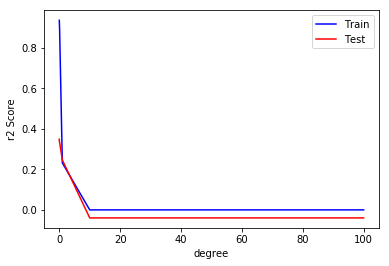

In [40]:
plt.plot(param_grid_lasso['alpha'], grid_search_lasso_reg_100.cv_results_['mean_train_score'], 'b-', label="Train")
plt.plot(param_grid_lasso['alpha'], grid_search_lasso_reg_100.cv_results_['mean_test_score'],'r-', label="Test")
plt.legend(loc='upper right')
plt.xlabel('degree')
plt.ylabel('r2 Score')

In [41]:

lasso_best_param_100 = format(grid_search_lasso_reg_100.best_params_)
lasso_cv_score_100 = round(grid_search_lasso_reg_100.best_score_,2 )
lasso_train_score_100 = round((grid_search_lasso_reg_100.score(X_train_scaled, y_train)),2)
lasso_test_score_100= round((grid_search_lasso_reg_100.score(X_test_scaled, y_test)),2)

In [42]:
f = open('result-audit_PCA_Regression.csv','a')
line = 'Lasso_PCA,' + str(lasso_best_param_100) + ' ,' + str(lasso_train_score_100) + ',' + str(lasso_test_score_100) + ',' + str(lasso_cv_score_100) +'\n' 
f.write(line)
f.close()

#### Lasso Regression using GridSearchCV after PCA (95% variance)

In [43]:
param_grid_lasso = {
              'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

print("Parameter grid:\n{}".format(param_grid_lasso))

grid_search_lasso_reg_95 = GridSearchCV(Lasso(),param_grid_lasso,cv=5,return_train_score=True)
grid_search_lasso_reg_95.fit(X_train_scaled_95, np.ravel(y_train,order='C'))
pred_grid_search=grid_search_lasso_reg_95.predict(X_test_scaled_95)

print("Best parameters: {}".format(grid_search_lasso_reg_95.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_lasso_reg_95.best_score_))
print("Best Estimator:".format(grid_search_lasso_reg_95.best_estimator_))
print("Training Score: {:.2f}".format((grid_search_lasso_reg_95.score(X_train_scaled_95, y_train))))
print("Testing Score: {:.2f}".format((grid_search_lasso_reg_95.score(X_test_scaled_95, y_test))))
print("Best estimator: {}".format(grid_search_lasso_reg_95.best_estimator_))


Parameter grid:
{'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
Best parameters: {'alpha': 1}
Best cross-validation score: 0.26
Best Estimator:
Training Score: 0.10
Testing Score: 0.21
Best estimator: Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)


Text(0,0.5,'r2 Score')

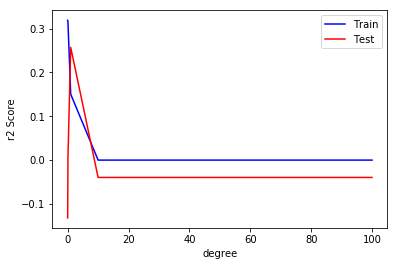

In [44]:
plt.plot(param_grid_lasso['alpha'], grid_search_lasso_reg_95.cv_results_['mean_train_score'], 'b-', label="Train")
plt.plot(param_grid_lasso['alpha'], grid_search_lasso_reg_95.cv_results_['mean_test_score'],'r-', label="Test")
plt.legend(loc='upper right')
plt.xlabel('degree')
plt.ylabel('r2 Score')

In [45]:
lasso_best_param_95 = format(grid_search_lasso_reg_95.best_params_)
lasso_cv_score_95 = round(grid_search_lasso_reg_95.best_score_,2)
lasso_train_score_95 = round((grid_search_lasso_reg_95.score(X_train_scaled_95, y_train)),2)
lasso_test_score_95= round((grid_search_lasso_reg_95.score(X_test_scaled_95, y_test)),2)

In [46]:
f = open('result-audit_PCA_Regression.csv','a')
line = 'Lasso_PCA_95,' + str(lasso_best_param_95) + ' ,' + str(lasso_train_score_95) + ',' + str(lasso_test_score_95) + ',' + str(lasso_cv_score_95) +'\n' 
f.write(line)
f.close()

#### Linear SVR using GridSearchCV after PCA (100% variance)

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100]}
Best parameters: {'C': 100}
Best cross-validation score: 0.62
Best Estimator:
Training Score: 0.43
Testing Score: 0.91
Best estimator: LinearSVR(C=100, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)
[-0.09617562 -0.06856373  0.05578762  0.22465496  0.45430719  0.62122349]


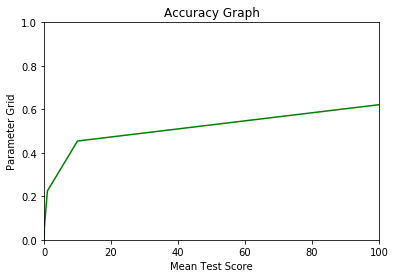

In [47]:
param_grid_linearSVR = {
              'C': [0.001, 0.01, 0.1, 1, 10, 100]}

print("Parameter grid:\n{}".format(param_grid_linearSVR))

grid_search_linearSVR_100 = GridSearchCV(LinearSVR(),param_grid_linearSVR,cv=5,return_train_score=True)
grid_search_linearSVR_100.fit(X_train_scaled, np.ravel(y_train,order='C'))
pred_grid_search=grid_search_linearSVR_100.predict(X_test_scaled)

print("Best parameters: {}".format(grid_search_linearSVR_100.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_linearSVR_100.best_score_))
print("Best Estimator:".format(grid_search_linearSVR_100.best_estimator_))
print("Training Score: {:.2f}".format((grid_search_linearSVR_100.score(X_train_scaled, y_train))))
print("Testing Score: {:.2f}".format((grid_search_linearSVR_100.score(X_test_scaled, y_test))))
print("Best estimator: {}".format(grid_search_linearSVR_100.best_estimator_))

print(grid_search_linearSVR_100.cv_results_['mean_test_score'])
x_axis = pd.DataFrame(param_grid_linearSVR['C']) 
y_axis = pd.DataFrame(grid_search_linearSVR_100.cv_results_['mean_test_score'])
plt.plot(x_axis,y_axis, color='g')
plt.autoscale(False)
plt.xlim(0.01, 100)
plt.ylim(0, 1)
plt.xlabel('Mean Test Score')
plt.ylabel('Parameter Grid')
plt.title('Accuracy Graph')
plt.show()

In [48]:
SVR_best_param_100 = format(grid_search_linearSVR_100.best_params_)
SVR_cv_score_100 = round(grid_search_linearSVR_100.best_score_,2)
SVR_train_score_100 = round((grid_search_linearSVR_100.score(X_train_scaled, y_train)),2)
SVR_test_score_100= round((grid_search_linearSVR_100.score(X_test_scaled, y_test)),2)

In [49]:
f = open('result-audit_PCA_Regression.csv','a')
line = 'Linear_SVR_PCA,' + str(SVR_best_param_100) + ' ,' + str(SVR_train_score_100) + ',' + str(SVR_test_score_100) + ' ,' + str(SVR_cv_score_100) +'\n' 
f.write(line)
f.close()

#### LinearSVR using GridSearchCV after PCA (95% variance)

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100]}
Best parameters: {'C': 100}
Best cross-validation score: 0.39
Best Estimator:
Training Score: 0.16
Testing Score: 0.45
Best estimator: LinearSVR(C=100, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)
[-0.096757   -0.06813227  0.05610107  0.20410032  0.33307505  0.39038086]


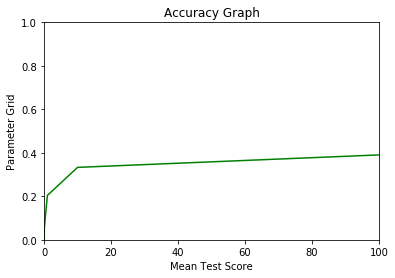

In [50]:
param_grid_linearSVR = {
              'C': [0.001, 0.01, 0.1, 1, 10, 100]}

print("Parameter grid:\n{}".format(param_grid_linearSVR))

grid_search_linearSVR_95 = GridSearchCV(LinearSVR(),param_grid_linearSVR,cv=5,return_train_score=True)
grid_search_linearSVR_95.fit(X_train_scaled_95, np.ravel(y_train,order='C'))
pred_grid_search=grid_search_linearSVR_95.predict(X_test_scaled_95)

print("Best parameters: {}".format(grid_search_linearSVR_95.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_linearSVR_95.best_score_))
print("Best Estimator:".format(grid_search_linearSVR_95.best_estimator_))
print("Training Score: {:.2f}".format((grid_search_linearSVR_95.score(X_train_scaled_95, y_train))))
print("Testing Score: {:.2f}".format((grid_search_linearSVR_95.score(X_test_scaled_95, y_test))))
print("Best estimator: {}".format(grid_search_linearSVR_95.best_estimator_))

print(grid_search_linearSVR_95.cv_results_['mean_test_score'])
x_axis = pd.DataFrame(param_grid_linearSVR['C']) 
y_axis = pd.DataFrame(grid_search_linearSVR_95.cv_results_['mean_test_score'])
plt.plot(x_axis,y_axis, color='g')
plt.autoscale(False)
plt.xlim(0.01, 100)
plt.ylim(0, 1)
plt.xlabel('Mean Test Score')
plt.ylabel('Parameter Grid')
plt.title('Accuracy Graph')
plt.show()

In [51]:
SVR_best_param_95 = format(grid_search_linearSVR_95.best_params_)
SVR_cv_score_95 = round(grid_search_linearSVR_95.best_score_,2)
SVR_train_score_95 = round((grid_search_linearSVR_95.score(X_train_scaled_95, y_train)),2)
SVR_test_score_95= round((grid_search_linearSVR_95.score(X_test_scaled_95, y_test)),2)

In [52]:
f = open('result-audit_PCA_Regression.csv','a')
line = 'Linear_SVR_PCA_95,' + str(SVR_best_param_95) + ' ,' + str(SVR_train_score_95) + ',' + str(SVR_test_score_95) + ' ,' + str(SVR_cv_score_95) +'\n' 
f.write(line)
f.close()

#### Kernalized SVR using GridSearchCV after PCA (100% variance)

``Kernel RBF``

Parameter grid:
{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
Best parameters: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
Best cross-validation score: 0.58
Best Estimator:
Training Score: 0.45
Testing Score: 0.84
Best estimator: SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


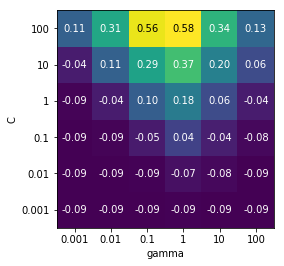

In [53]:
param_grid_RBF = {'kernel':['rbf'],
            'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

print("Parameter grid:\n{}".format(param_grid_RBF))

grid_search_RBF_reg_100 = GridSearchCV(SVR(),param_grid_RBF,cv=5,return_train_score=True)
grid_search_RBF_reg_100.fit(X_train_scaled, y_train)
pred_grid_search=grid_search_RBF_reg_100.predict(X_test_scaled)

print("Best parameters: {}".format(grid_search_RBF_reg_100.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_RBF_reg_100.best_score_))
print("Best Estimator:".format(grid_search_RBF_reg_100.best_estimator_))
print("Training Score: {:.2f}".format((grid_search_RBF_reg_100.score(X_train_scaled, y_train))))
print("Testing Score: {:.2f}".format((grid_search_RBF_reg_100.score(X_test_scaled, y_test))))
print("Best estimator: {}".format(grid_search_RBF_reg_100.best_estimator_))

results_RBF_reg_100 = pd.DataFrame(grid_search_RBF_reg_100.cv_results_)
scores = np.array(results_RBF_reg_100.mean_test_score).reshape(6,6)
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid_RBF['gamma'], ylabel='C', yticklabels=param_grid_RBF['C'], cmap="viridis")

In [54]:
SVR_rbf_best_param_100 = format(grid_search_RBF_reg_100.best_params_)
SVR_rbf_best_param_100=SVR_rbf_best_param_100.replace(',', '')
SVR_rbf_cv_score_100 = round(grid_search_RBF_reg_100.best_score_,2)
SVR_rbf_train_score_100 = round((grid_search_RBF_reg_100.score(X_train_scaled, y_train)),2)
SVR_rbf_test_score_100= round((grid_search_RBF_reg_100.score(X_test_scaled, y_test)),2)

In [55]:
f = open('result-audit_PCA_Regression.csv','a')
line = 'SVR with RBF kernel PCA,' + str(SVR_rbf_best_param_100) + ' ,' + str(SVR_rbf_train_score_100) + ',' + str(SVR_rbf_test_score_100) + ' ,' + str(SVR_rbf_cv_score_100) +'\n' 
f.write(line)
f.close()

#### Kernalized SVR using GridSearchCV after PCA (95% variance)

``Kernel RBF``

Parameter grid:
{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
Best parameters: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
Best cross-validation score: 0.48
Best Estimator:
Training Score: 0.29
Testing Score: 0.30
Best estimator: SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


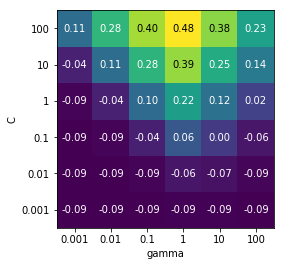

In [56]:
param_grid_RBF = {'kernel':['rbf'],
            'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

print("Parameter grid:\n{}".format(param_grid_RBF))

grid_search_RBF_reg_95 = GridSearchCV(SVR(),param_grid_RBF,cv=5,return_train_score=True)
grid_search_RBF_reg_95.fit(X_train_scaled_95, np.ravel(y_train,order='C'))
pred_grid_search=grid_search_RBF_reg_95.predict(X_test_scaled_95)

print("Best parameters: {}".format(grid_search_RBF_reg_95.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_RBF_reg_95.best_score_))
print("Best Estimator:".format(grid_search_RBF_reg_95.best_estimator_))
print("Training Score: {:.2f}".format((grid_search_RBF_reg_95.score(X_train_scaled_95, y_train))))
print("Testing Score: {:.2f}".format((grid_search_RBF_reg_95.score(X_test_scaled_95, y_test))))
print("Best estimator: {}".format(grid_search_RBF_reg_95.best_estimator_))


results_RBF_95 = pd.DataFrame(grid_search_RBF_reg_95.cv_results_)
scores = np.array(results_RBF_95.mean_test_score).reshape(6, 6)
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid_RBF['gamma'], ylabel='C', yticklabels=param_grid_RBF['C'], cmap="viridis")


In [57]:
SVR_rbf_best_param_95 = format(grid_search_RBF_reg_95.best_params_)
SVR_rbf_best_param_95=SVR_rbf_best_param_95.replace(',', '')
SVR_rbf_cv_score_95 = round(grid_search_RBF_reg_95.best_score_,2)
SVR_rbf_train_score_95 = round((grid_search_RBF_reg_95.score(X_train_scaled_95, y_train)),2)
SVR_rbf_test_score_95 = round((grid_search_RBF_reg_95.score(X_test_scaled_95, y_test)),2)

In [58]:
f = open('result-audit_PCA_Regression.csv','a')
line = 'SVR with RBF kernel PCA_95,' + str(SVR_rbf_best_param_95) + ' ,' + str(SVR_rbf_train_score_95) + ',' + str(SVR_rbf_test_score_95) + ' ,' + str(SVR_rbf_cv_score_95) +'\n' 
f.write(line)
f.close()

#### Kernalized SVR using GridSearchCV after PCA (100% variance)

``Kernel Poly``

Parameter grid:
{'kernel': ['poly'], 'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10, 100]}
Best parameters: {'C': 100, 'gamma': 1, 'kernel': 'poly'}
Best cross-validation score: 0.87
Best Estimator:
Training Score: 1.00
Testing Score: 0.96
Best estimator: SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


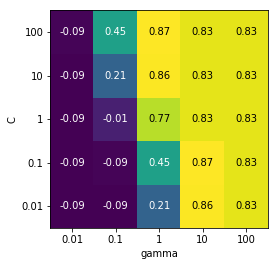

In [59]:
param_grid_poly_reg = {'kernel':['poly'],
            'C': [ 0.01, 0.1, 1, 10, 100],
              'gamma': [ 0.01, 0.1, 1, 10, 100]}

print("Parameter grid:\n{}".format(param_grid_poly_reg))

grid_search_poly_reg_100 = GridSearchCV(SVR(),param_grid_poly_reg,cv=5,return_train_score=True, n_jobs = -1)
grid_search_poly_reg_100.fit(X_train_scaled, np.ravel(y_train,order='C'))
pred_grid_search=grid_search_poly_reg_100.predict(X_test_scaled)

print("Best parameters: {}".format(grid_search_poly_reg_100.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_poly_reg_100.best_score_))
print("Best Estimator:".format(grid_search_poly_reg_100.best_estimator_))
print("Training Score: {:.2f}".format((grid_search_poly_reg_100.score(X_train_scaled, y_train))))
print("Testing Score: {:.2f}".format((grid_search_poly_reg_100.score(X_test_scaled, y_test))))
print("Best estimator: {}".format(grid_search_poly_reg_100.best_estimator_))


results_poly_100 = pd.DataFrame(grid_search_poly_reg_100.cv_results_)
scores = np.array(results_poly_100.mean_test_score).reshape(5, 5)
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid_poly_reg['gamma'], ylabel='C', yticklabels=param_grid_poly_reg['C'], cmap="viridis")


In [60]:
SVR_poly_best_param_100 = format(grid_search_poly_reg_100.best_params_)
SVR_poly_best_param_100=SVR_poly_best_param_100.replace(',', '')
SVR_poly_cv_score_100 = round(grid_search_poly_reg_100.best_score_,2)
SVR_poly_train_score_100 = round((grid_search_poly_reg_100.score(X_train_scaled, y_train)),2)
SVR_poly_test_score_100= round((grid_search_poly_reg_100.score(X_test_scaled, y_test)),2)

In [61]:
f = open('result-audit_PCA_Regression.csv','a')
line = 'SVR with poly kernel PCA,' + str(SVR_poly_best_param_100) + ' ,' + str(SVR_poly_train_score_100) + ',' + str(SVR_poly_test_score_100) + ' ,' + str(SVR_poly_cv_score_100) +'\n' 
f.write(line)
f.close()

#### Kernalized SVR using GridSearchCV after PCA (95% variance)

``Kernel Poly``

In [62]:
#param_grid_poly_reg = {'kernel':['poly'],
#            'C': [ 0.01, 0.1, 1, 10, 100],
#              'gamma': [ 0.01, 0.1, 1, 10, 100]}
#
#print("Parameter grid:\n{}".format(param_grid_poly_reg))

#grid_search_poly_reg_95 = GridSearchCV(SVR(),param_grid_poly_reg, cv=5, return_train_score=True, n_jobs = -1)
#grid_search_poly_reg_95.fit(X_train_scaled_95, np.ravel(y_train,order='C'))
#pred_grid_search=grid_search_poly_reg_95.predict(X_test_scaled_95)

#print("Best parameters: {}".format(grid_search_poly_reg_95.best_params_))
#print("Best cross-validation score: {:.2f}".format(grid_search_poly_reg_95.best_score_))
#print("Best Estimator:".format(grid_search_poly_reg_95.best_estimator_))
#print("Training Score: {:.2f}".format((grid_search_poly_reg_95.score(X_train_scaled_95, y_train))))
#print("Testing Score: {:.2f}".format((grid_search_poly_reg_95.score(X_test_scaled_95, y_test))))
#print("Best estimator: {}".format(grid_search_poly_reg_95.best_estimator_))


#results_poly_95 = pd.DataFrame(grid_search_poly_reg_95.cv_results_)
#scores = np.array(results_poly_95.mean_test_score).reshape(5, 5)
#mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid_poly_reg['gamma'], ylabel='C', yticklabels=param_grid_poly_reg['C'], cmap="viridis")


In [63]:
#SVR_poly_best_param_95 = format(grid_search_poly_reg_95.best_params_)
#SVR_poly_best_param_95=SVR_poly_best_param_95.replace(',', '')
#SVR_poly_cv_score_95 = round(grid_search_poly_reg_95.best_score_,2)
#SVR_poly_train_score_95 = round((grid_search_poly_reg_95.score(X_train_scaled_95, y_train)),2)
#SVR_poly_test_score_95 = round((grid_search_poly_reg_95.score(X_test_scaled_95, y_test)),2)

In [64]:
#f = open('result-audit_PCA_Regression.csv','a')
#line = 'SVR with polynomial kernel PCA_95,' + str(SVR_poly_best_param_95) + ' ,' + str(SVR_poly_train_score_95) + ',' + str(SVR_poly_test_score_95) + ' ,' + str(SVR_poly_cv_score_95) +'\n' 
#f.write(line)
#f.close()

#### Linear Regression with PCA (100% variance)

In [65]:
from sklearn.model_selection import cross_val_score
lreg = LinearRegression()
scores = cross_val_score(lreg,X_train_scaled,y_train,cv=5)
print("Training Cross-validation scores: {}".format(scores))
print("Training Average Cross-validation score: {}".format(scores.mean()))
lreg.fit(X_train_scaled,y_train)
print("Train score: {}".format(lreg.score(X_train_scaled,y_train)))
print("Testing score: {}".format(lreg.score(X_test_scaled,y_test)))

Training Cross-validation scores: [-1.31335479e+21 -3.67792140e+23  2.44065226e-01  6.58554356e-01
 -9.93826345e-02]
Training Average Cross-validation score: -7.3821099053735114e+22
Train score: 0.9301104710108674
Testing score: 0.3804139477873376


In [66]:
lr_score_mean = round(scores.mean(),2)
lr_train_score = round(lreg.score(X_train_scaled,y_train),2)
lr_test_score = round(lreg.score(X_test_scaled,y_test),2)

Text(0.5,0,'RM')

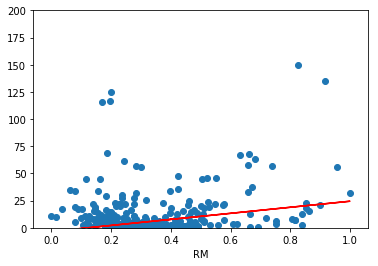

In [67]:
X_train_rm = X_train_scaled[:,5].reshape(-1,1)
lreg.fit(X_train_rm, y_train)
y_predict = lreg.predict(X_train_rm)

plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.ylim(0, 200)
plt.xlabel('RM')

In [68]:
f = open('result-audit_PCA_Regression.csv','a')
line = 'Linear Regression PCA,' + ' ,' + str(lr_train_score) + ',' + str(lr_test_score) + ',' + str(lr_score_mean) +'\n' 
f.write(line)
f.close()

#### Linear Regression with PCA (95% variance)

In [69]:
scores_95 = cross_val_score(lreg,X_train_scaled_95,y_train,cv=5)
print("Training Cross-validation scores: {}".format(scores))
print("Training Average Cross-validation score: {}".format(scores.mean()))
lreg.fit(X_train_scaled_95,y_train)
print("Train score: {}".format(lreg.score(X_train_scaled_95,y_train)))
print("Testing score: {}".format(lreg.score(X_test_scaled_95,y_test)))

Training Cross-validation scores: [-1.31335479e+21 -3.67792140e+23  2.44065226e-01  6.58554356e-01
 -9.93826345e-02]
Training Average Cross-validation score: -7.3821099053735114e+22
Train score: 0.2620972592698335
Testing score: -0.3140946210205673


In [70]:
LR_mean_scores_95= round(scores_95.mean(),2)
LR_train_score_95 = round((lreg.score(X_train_scaled_95, y_train)),2)
LR_test_score_95= round((lreg.score(X_test_scaled_95, y_test)),2)

Text(0.5,0,'RM')

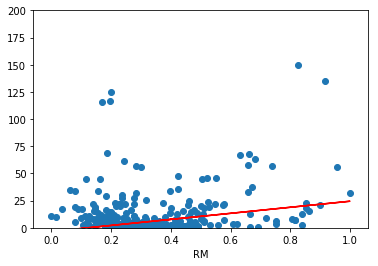

In [71]:
X_train_rm = X_train_scaled[:,5].reshape(-1,1)
lreg.fit(X_train_rm, y_train)
y_predict = lreg.predict(X_train_rm)

plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.ylim(0, 200)
plt.xlabel('RM')

In [72]:
f = open('result-audit_PCA_Regression.csv','a')
line = 'Linear Regression PCA_95,' + ' ,' + str(LR_train_score_95) + ',' + str(LR_test_score_95) + ',' + str(LR_mean_scores_95) +'\n' 
f.write(line)
f.close()

# Deep Learning : Regression

In [ ]:
#Converting values into numpy arrays

X_num = X.values
y_num = y.values



In [ ]:
#using grid search to find the optimum number of parameters fro epchos and atch size

#from tensorflow.keras.wrappers.sckit_learn import KerasClassifier

# Function to create model, required for KerasRegressor
def create_model():
    # create model
    model1 = Sequential()
    model1.add(Dense(12, activation='relu'))
    model1.add(Dense(8, activation='relu'))
    model1.add(Dense(1, activation='relu'))
    
    #compile Model
    model1.compile(loss='mse', optimizer = 'adam', metrics =['mse'])
    return model1

# fix random seed for reproducibility

seed = 7
numpy.random.seed(seed)

base_reg = KerasRegressor(build_fn=create_model, verbose = -1)  #return_train_score=True

# grid search epochs, batch size and optimizer

grid_param = {'epochs':[50,100,150],'batch_size':[20,50,100]}
grid = GridSearchCV(estimator=base_reg, param_grid=grid_param)
grid_result = grid.fit(X_num, y_num)


#evaluate
print("Best: %f using %s" % ((-1)*grid_result.best_score_, grid_result.best_params_))

means_t_r = grid_result.cv_results_['mean_train_score']
means_r = grid_result.cv_results_['mean_test_score']
stds_r = grid_result.cv_results_['std_test_score']
params_r = grid_result.cv_results_['params']

#for mean_t,mean, stdev, param in zip(means_t_r,means_r, stds_r, params_r):
#	print("Train Score: %f, Test Score: %f, Standard Test Score: %f, with: Parameters: %r" % ((-1)*mean_t, (-1)*mean, stdev, param))

result = pd.DataFrame(grid.cv_results_)

In [ ]:
result_reg = pd.DataFrame(grid_result.cv_results_)
result_reg

# Data Preparation for Classification

In [73]:
# creating X and Y datasets

X_c = audit_df.drop(['RISK_x','RISK_y','AUDIT_RISK'], axis=1)
X_c.head()

,SECTOR_SCORE,LOCATION_ID,PARA_A,SCORE_A,RISK_A,PARA_B,SCORE_B,RISK_B,TOTAL,NUMBERS,...,HISTORY,PROB_EXTRA,RISK_F,SCORE,INHERENT_RISK,CONTROL_RISK,DETECTION_RISK,MARKS,MONEY_MARKS,LOSS
0,3.89,23,4.18,6.0,2.508,2.50,2.0,0.500,6.68,5.0,...,0,0.2,0.0,2.4,8.574,0.4,0.5,2,2,0
1,3.89,6,0.00,2.0,0.000,4.83,2.0,0.966,4.83,5.0,...,0,0.2,0.0,2.0,2.554,0.4,0.5,2,2,0
2,3.89,6,0.51,2.0,0.102,0.23,2.0,0.046,0.74,5.0,...,0,0.2,0.0,2.0,1.548,0.4,0.5,2,2,0
3,3.89,6,0.00,2.0,0.000,10.80,6.0,6.480,10.80,6.0,...,0,0.2,0.0,4.4,17.530,0.4,0.5,6,6,0
4,3.89,6,0.00,2.0,0.000,0.08,2.0,0.016,0.08,5.0,...,0,0.2,0.0,2.0,1.416,0.4,0.5,2,2,0


In [74]:
y_c = audit_df['RISK_x']
y_c.head()

0    1
1    0
2    0
3    1
4    0
Name: RISK_x, dtype: int64

In [75]:
from sklearn.model_selection import train_test_split

X_c_train_org , X_c_test_org, y_c_train, y_c_test = train_test_split(X_c, y_c, test_size = 0.15, random_state = 0)
#scale 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
#X_train = scaler.fit_transform(X_train_org)
scaler.fit(X_c_train_org)
X_c_train = scaler.transform(X_c_train_org)
X_c_test= scaler.transform(X_c_test_org)

### Voting classifier

#### Hard Voting classifier

In [76]:
log_clf = LogisticRegression()
log_clf.fit(X_c_train, y_c_train)
knn_clf = KNeighborsClassifier(7)
knn_clf.fit(X_c_train, y_c_train)
svm_clf = SVC(C = 10, probability = True)
svm_clf.fit(X_c_train, y_c_train)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svm_clf)], voting='hard')
voting_clf.fit(X_c_train, y_c_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, svm_clf, voting_clf):
    clf.fit(X_c_train, y_c_train)
    y_pred = clf.predict(X_c_test)
    print(clf.__class__.__name__, accuracy_score(y_c_test, y_pred))

LogisticRegression 0.9672131147540983
KNeighborsClassifier 0.9426229508196722
SVC 0.9672131147540983
VotingClassifier 0.9672131147540983


C:\Users\mishr\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


#### Soft Voting Classifier

In [77]:
log_clf = LogisticRegression()
log_clf.fit(X_c_train, y_c_train)

dtree_clf= DecisionTreeClassifier(max_depth=3, random_state=0)
dtree_clf.fit(X_c_train,y_c_train)

svm_clf = SVC(C = 10, probability = True)
svm_clf.fit(X_c_train, y_c_train)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('dtree', dtree_clf), ('svc', svm_clf)], voting='soft')
voting_clf.fit(X_c_train, y_c_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf, dtree_clf, svm_clf, voting_clf):
    clf.fit(X_c_train, y_c_train)
    y_pred = clf.predict(X_c_test)
    print(clf.__class__.__name__, accuracy_score(y_c_test, y_pred))

LogisticRegression 0.9672131147540983
DecisionTreeClassifier 0.9754098360655737
SVC 0.9672131147540983
VotingClassifier 0.9590163934426229


C:\Users\mishr\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### Bagging with Logistic and KNN 

In [78]:
bag_clf_1 = BaggingClassifier(log_clf, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)
bag_clf_2 = BaggingClassifier(knn_clf, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)

bag_clf_1.fit(X_c_train, np.ravel(y_c_train,order='C'))
y_pred = bag_clf_1.predict(X_c_test)
print("Logistic Regression Bagging Score {:.2f}".format(accuracy_score(y_c_test, y_pred)))

bag_clf_2.fit(X_c_train, np.ravel(y_c_train,order='C'))
y_pred = bag_clf_2.predict(X_c_test)
print("K-Nearest Neighbor Bagging Score {:.2f}".format(accuracy_score(y_c_test, y_pred)))

Logistic Regression Bagging Score 0.93
K-Nearest Neighbor Bagging Score 0.90


### Pasting with SVM and Decision Tree Classifier

In [79]:
pas_clf_1 = BaggingClassifier(svm_clf, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)
pas_clf_2 = BaggingClassifier(dtree_clf, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)

pas_clf_1.fit(X_c_train, np.ravel(y_c_train,order='C'))
y_pred = pas_clf_1.predict(X_c_test)
print("Support Vector Machine Pasting Score {:.2f}".format(accuracy_score(y_c_test, y_pred)))

pas_clf_2.fit(X_c_train, np.ravel(y_c_train,order='C'))
y_pred = pas_clf_2.predict(X_c_test)
print("Decision Tree Pasting Score {:.2f}".format(accuracy_score(y_c_test, y_pred)))

Support Vector Machine Pasting Score 0.95
Decision Tree Pasting Score 0.98


### ADABoost with Logistic Regression and Decision Tree Classifier

In [80]:
ada_clf_1 = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=0)
ada_clf_1.fit(X_c_train, np.ravel(y_c_train,order='C'))
y_pred = pas_clf_1.predict(X_c_test)
print("Decision Tree with ADABoost Score {:.2f}".format(accuracy_score(y_c_test, y_pred)))

ada_clf_2 = AdaBoostClassifier(LogisticRegression(), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=0)
ada_clf_2.fit(X_c_train, np.ravel(y_c_train,order='C'))
y_pred = pas_clf_2.predict(X_c_test)
print("Logistic Regression with ADABoost Score {:.2f}".format(accuracy_score(y_c_test, y_pred)))

Decision Tree with ADABoost Score 0.95
Logistic Regression with ADABoost Score 0.98


### Gradient boosting

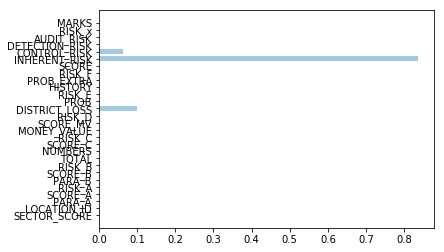

In [81]:
gbrt = GradientBoostingClassifier(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X_c_train, np.ravel(y_c_train,order='C'))
y_list = gbrt.feature_importances_
y_pos = np.arange(len(y_list))
features = list(audit_df.columns.values)
plt1.barh(y_pos, y_list, align='center', alpha=0.4)
plt1.yticks(y_pos, features)

plt1.rcParams["figure.figsize"] = (8,10)
plt1.rcParams["xtick.labelsize"] = 7

In [82]:
plt1.rcParams["figure.figsize"] = (6,6)

In [83]:
f = open('result-audit_PCA_Classification.csv','a')
line = 'Model name, Best Parameters, Train Score, Test Score, Best Cross-Validation score\n'
f.write(line)
f.close()

### Principal Component Analysis

In [84]:
pca = PCA()  
X_c_train_pca = pca.fit_transform(X_c_train)  
X_c_test_pca = pca.transform(X_c_test)  

In [85]:
X_c_train_pca.shape

(688, 28)

### 0.95 explained variance

In [86]:
pca_c_95 = PCA(n_components=0.95)
pca_c_95.fit(X_train)
X_c_train_reduced = pca_c_95.transform(X_c_train)
X_c_test_reduced = pca_c_95.transform(X_c_test)

In [87]:
pca_c_95.n_components_

8

In [88]:
pca_c_95.explained_variance_

array([0.62979455, 0.16167097, 0.12504968, 0.11104509, 0.06502424,
       0.06423929, 0.0514741 , 0.04108523])

### Scaling

In [89]:
scaler = MinMaxScaler()
X_c_train_scaled = scaler.fit_transform(X_c_train_pca)
X_c_test_scaled = scaler.transform(X_c_test_pca)

X_c_train_scaled_95 = scaler.fit_transform(X_c_train_reduced)
X_c_test_scaled_95 = scaler.transform(X_c_test_reduced)

#### KNN Classifier Using GridSearchCV after PCA (100% variance)

In [90]:
k_range = list(range(1, 31))
param_grid_knn = dict(n_neighbors=k_range)

print("Parameter grid:\n{}".format(param_grid_knn))
grid_search_knn_c_100 = GridSearchCV(KNeighborsClassifier(),param_grid_knn,cv=5,return_train_score=True)
grid_search_knn_c_100.fit(X_c_train_scaled, np.ravel(y_c_train,order='C'))

pred_grid_search=grid_search_knn_c_100.predict(X_c_test_scaled)
print("Best parameters: {}".format(grid_search_knn_c_100.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_knn_c_100.best_score_))
print("Best Estimator:".format(grid_search_knn_c_100.best_estimator_))
print("f1 score KNN: {:.2f}".format(f1_score(y_c_test, pred_grid_search)))

conf_matrix=confusion_matrix(y_c_test,pred_grid_search)
print("Confusion matrix:\n{}".format(conf_matrix))
print("Training Score: {:.2f}".format((grid_search_knn_c_100.score(X_c_train_scaled, y_c_train))))
print("Testing Score: {:.2f}".format((grid_search_knn_c_100.score(X_c_test_scaled, y_c_test))))

print(classification_report(y_c_test, pred_grid_search, target_names=["not Fradulent", "Fradulent"]))
print("Best estimator: {}".format(grid_search_knn_c_100.best_estimator_))

avg_precision_knn = average_precision_score(y_c_test, grid_search_knn_c_100.best_estimator_.predict_proba(X_c_test_scaled)[:, 1])
print("Average precision of KNN : {:.3f}".format(avg_precision_knn))

knn_auc = roc_auc_score(y_c_test, grid_search_knn_c_100.best_estimator_.predict_proba(X_c_test_scaled)[:, 1])
print("AUC for KNN: {:.3f}".format(knn_auc)) 

Parameter grid:
{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}
Best parameters: {'n_neighbors': 5}
Best cross-validation score: 0.95
Best Estimator:
f1 score KNN: 0.94
Confusion matrix:
[[76  0]
 [ 5 41]]
Training Score: 0.97
Testing Score: 0.96
               precision    recall  f1-score   support

not Fradulent       0.94      1.00      0.97        76
    Fradulent       1.00      0.89      0.94        46

  avg / total       0.96      0.96      0.96       122

Best estimator: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
Average precision of KNN : 0.968
AUC for KNN: 0.975


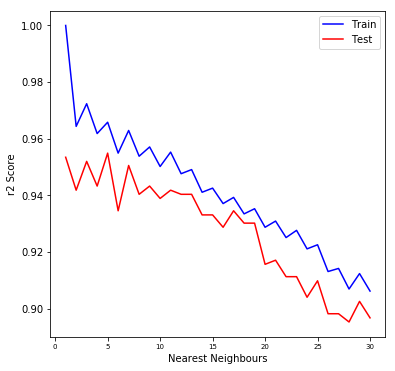

In [91]:
plt.plot(param_grid_knn['n_neighbors'], grid_search_knn_c_100.cv_results_['mean_train_score'], 'b-', label="Train")
plt.plot(param_grid_knn['n_neighbors'], grid_search_knn_c_100.cv_results_['mean_test_score'],'r-', label="Test")
plt.legend(loc='upper right')
plt.xlabel('Nearest Neighbours')
plt.ylabel('r2 Score')
plt.show()

In [92]:
knn_c_best_param = format(grid_search_knn_c_100.best_params_)
knn_c_cv_score = round(grid_search_knn_c_100.best_score_,2)
knn_c_train_score = round((grid_search_knn_c_100.score(X_c_train_scaled, y_c_train)),2)
knn_c_test_score= round((grid_search_knn_c_100.score(X_c_test_scaled, y_c_test)),2)

f = open('result-audit_PCA_Classification.csv','a')
line = 'KNN Classifier_PCA,' + str(knn_c_best_param)+ ',' + str(knn_c_train_score) + ',' + str(knn_c_test_score) + ' ,' + str(knn_c_cv_score) +'\n' 
f.write(line)
f.close()

#### KNN Using GridSearchCV after PCA (95% variance)

In [93]:
k_range = list(range(1, 31))
param_grid_knn = dict(n_neighbors=k_range)

print("Parameter grid:\n{}".format(param_grid_knn))
grid_search_knn_c_95 = GridSearchCV(KNeighborsClassifier(),param_grid_knn,cv=5,return_train_score=True)
grid_search_knn_c_95.fit(X_c_train_scaled_95, np.ravel(y_c_train,order='C'))

pred_grid_search=grid_search_knn_c_95.predict(X_c_test_scaled_95)
print("Best parameters: {}".format(grid_search_knn_c_95.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_knn_c_95.best_score_))
print("Best Estimator:".format(grid_search_knn_c_95.best_estimator_))

print("f1 score KNN: {:.2f}".format(f1_score(y_c_test, pred_grid_search)))
conf_matrix=confusion_matrix(y_c_test,pred_grid_search)
print("Confusion matrix:\n{}".format(conf_matrix))
print("Training Score: {:.2f}".format((grid_search_knn_c_95.score(X_c_train_scaled_95, y_c_train))))
print("Testing Score: {:.2f}".format((grid_search_knn_c_95.score(X_c_test_scaled_95, y_c_test))))

print(classification_report(y_c_test, pred_grid_search, target_names=["not Fradulent", "Fradulent"]))
print("Best estimator: {}".format(grid_search_knn_c_95.best_estimator_))

avg_precision_knn = average_precision_score(y_c_test, grid_search_knn_c_95.best_estimator_.predict_proba(X_c_test_scaled_95)[:, 1])
print("Average precision of KNN : {:.3f}".format(avg_precision_knn))

knn_auc = roc_auc_score(y_c_test, grid_search_knn_c_95.best_estimator_.predict_proba(X_c_test_scaled_95)[:, 1])
print("AUC for KNN: {:.3f}".format(knn_auc)) 

Parameter grid:
{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}
Best parameters: {'n_neighbors': 1}
Best cross-validation score: 0.95
Best Estimator:
f1 score KNN: 0.92
Confusion matrix:
[[74  2]
 [ 5 41]]
Training Score: 1.00
Testing Score: 0.94
               precision    recall  f1-score   support

not Fradulent       0.94      0.97      0.95        76
    Fradulent       0.95      0.89      0.92        46

  avg / total       0.94      0.94      0.94       122

Best estimator: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')
Average precision of KNN : 0.891
AUC for KNN: 0.932


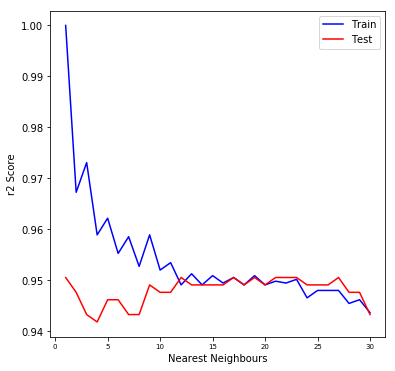

In [94]:
plt.plot(param_grid_knn['n_neighbors'], grid_search_knn_c_95.cv_results_['mean_train_score'], 'b-', label="Train")
plt.plot(param_grid_knn['n_neighbors'], grid_search_knn_c_95.cv_results_['mean_test_score'],'r-', label="Test")
plt.legend(loc='upper right')
plt.xlabel('Nearest Neighbours')
plt.ylabel('r2 Score')
plt.show()

In [95]:
knn_c_best_param_95 = format(grid_search_knn_c_95.best_params_)
knn_c_cv_score_95 = round(grid_search_knn_c_95.best_score_,2)
knn_c_train_score_95 = round((grid_search_knn_c_95.score(X_c_train_scaled_95, y_c_train)),2)
knn_c_test_score_95 = round((grid_search_knn_c_95.score(X_c_test_scaled_95, y_c_test)),2)

f = open('result-audit_PCA_Classification.csv','a')
line = 'KNN_PCA_95,' + str(knn_c_best_param_95) + ' ,' + str(knn_c_train_score_95) + ',' + str(knn_c_test_score_95) + ',' +str(knn_c_cv_score_95) +'\n' 
f.write(line)
f.close()

#### Logistic Regression Using GridSearchCV after PCA (100% variance)

Parameter grid:
{'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}
Best parameters: {'C': 100, 'penalty': 'l1'}
Best cross-validation score: 0.97
Best Estimator:
f1 score Logistic Regression: 0.94
Confusion matrix:
[[72  4]
 [ 2 44]]
Training Score: 0.99
Testing Score: 0.95
               precision    recall  f1-score   support

not Fradulent       0.97      0.95      0.96        76
    Fradulent       0.92      0.96      0.94        46

  avg / total       0.95      0.95      0.95       122

Best estimator: LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Average precision of Logistic Regression : 0.995
AUC for Logistic Regression: 0.997


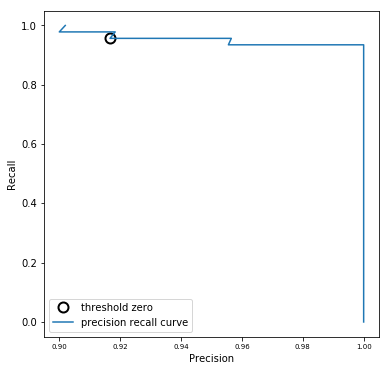

In [96]:
param_grid_logistic={'penalty': ['l1','l2'],
           'C':[0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid_logistic))
grid_search_logistic_100 = GridSearchCV(LogisticRegression(),param_grid_logistic,cv=5,return_train_score=True)
grid_search_logistic_100.fit(X_c_train_scaled, y_c_train)
pred_grid_search=grid_search_logistic_100.predict(X_c_test_scaled)
#print(pred_grid_search)
print("Best parameters: {}".format(grid_search_logistic_100.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_logistic_100.best_score_))
print("Best Estimator:".format(grid_search_logistic_100.best_estimator_))

print("f1 score Logistic Regression: {:.2f}".format(f1_score(y_c_test, pred_grid_search)))
conf_matrix=confusion_matrix(y_c_test,pred_grid_search)
print("Confusion matrix:\n{}".format(conf_matrix))
print("Training Score: {:.2f}".format((grid_search_logistic_100.score(X_c_train_scaled, y_c_train))))
print("Testing Score: {:.2f}".format((grid_search_logistic_100.score(X_c_test_scaled, y_c_test))))

print(classification_report(y_c_test, pred_grid_search, target_names=["not Fradulent", "Fradulent"]))
print("Best estimator: {}".format(grid_search_logistic_100.best_estimator_))
precision, recall, thresholds = precision_recall_curve(y_c_test, grid_search_logistic_100.decision_function(X_c_test_scaled))

close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

ap_lreg = average_precision_score(y_c_test, grid_search_logistic_100.best_estimator_.predict_proba(X_c_test_scaled)[:, 1])
print("Average precision of Logistic Regression : {:.3f}".format(ap_lreg))

lreg_auc = roc_auc_score(y_c_test, grid_search_logistic_100.best_estimator_.predict_proba(X_c_test_scaled)[:, 1])
print("AUC for Logistic Regression: {:.3f}".format(lreg_auc))

In [97]:
log_c_best_param = format(grid_search_logistic_100.best_params_)
log_c_best_param=log_c_best_param.replace(',', '')
log_c_cv_score = round(grid_search_logistic_100.best_score_,2)
log_c_train_score = round((grid_search_logistic_100.score(X_c_train_scaled, y_c_train)),2)
log_c_test_score= round((grid_search_logistic_100.score(X_c_test_scaled, y_c_test)),2)

f = open('result-audit_PCA_Classification.csv','a')
line = 'Logistic Regression_PCA,' + str(log_c_best_param)+ ',' + str(log_c_train_score) + ',' + str(log_c_test_score) + ' ,'+ str(log_c_cv_score) +'\n' 
f.write(line)
f.close()

#### Logistic Regression Using GridSearchCV after PCA (95% variance)

Parameter grid:
{'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}
Best parameters: {'C': 10, 'penalty': 'l2'}
Best cross-validation score: 0.96
Best Estimator:
f1 score Logistic Regression: 0.96
Confusion matrix:
[[75  1]
 [ 3 43]]
Training Score: 0.97
Testing Score: 0.97
               precision    recall  f1-score   support

not Fradulent       0.96      0.99      0.97        76
    Fradulent       0.98      0.93      0.96        46

  avg / total       0.97      0.97      0.97       122

Best estimator: LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Average precision of Logistic Regression : 0.990
AUC for Logistic Regression: 0.993


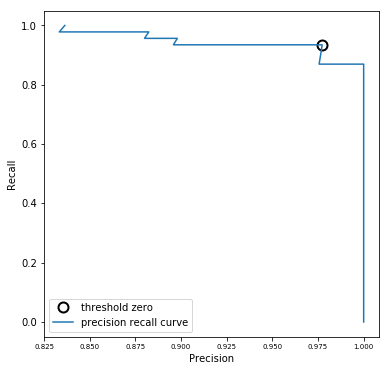

In [98]:
param_grid_logistic={'penalty': ['l1','l2'],
           'C':[0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid_logistic))
grid_search_logistic_95 = GridSearchCV(LogisticRegression(),param_grid_logistic,cv=5,return_train_score=True)
grid_search_logistic_95.fit(X_c_train_scaled_95, y_c_train)
pred_grid_search=grid_search_logistic_95.predict(X_c_test_scaled_95)
#print(pred_grid_search)
print("Best parameters: {}".format(grid_search_logistic_95.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_logistic_95.best_score_))
print("Best Estimator:".format(grid_search_logistic_95.best_estimator_))

print("f1 score Logistic Regression: {:.2f}".format(f1_score(y_c_test, pred_grid_search)))
conf_matrix=confusion_matrix(y_c_test,pred_grid_search)
print("Confusion matrix:\n{}".format(conf_matrix))
print("Training Score: {:.2f}".format((grid_search_logistic_95.score(X_c_train_scaled_95, y_c_train))))
print("Testing Score: {:.2f}".format((grid_search_logistic_95.score(X_c_test_scaled_95, y_c_test))))

print(classification_report(y_c_test, pred_grid_search, target_names=["not Fradulent", "Fradulent"]))
print("Best estimator: {}".format(grid_search_logistic_95.best_estimator_))
precision, recall, thresholds = precision_recall_curve(y_c_test, grid_search_logistic_95.decision_function(X_c_test_scaled_95))

close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

ap_lreg = average_precision_score(y_c_test, grid_search_logistic_95.best_estimator_.predict_proba(X_c_test_scaled_95)[:, 1])
print("Average precision of Logistic Regression : {:.3f}".format(ap_lreg))

lreg_auc = roc_auc_score(y_c_test, grid_search_logistic_95.best_estimator_.predict_proba(X_c_test_scaled_95)[:, 1])
print("AUC for Logistic Regression: {:.3f}".format(lreg_auc))

In [99]:
log_c_best_param_95 = format(grid_search_logistic_95.best_params_)
log_c_best_param_95=log_c_best_param_95.replace(',', '')
log_c_cv_score_95 = round(grid_search_logistic_95.best_score_,2)
log_c_train_score_95 = round((grid_search_logistic_95.score(X_c_train_scaled_95, y_c_train)),2)
log_c_test_score_95= round((grid_search_logistic_95.score(X_c_test_scaled_95, y_c_test)),2)

f = open('result-audit_PCA_Classification.csv','a')
line = 'Logistic Regression_PCA_95,' + str(log_c_best_param_95) + ' ,' + str(log_c_train_score_95) + ',' + str(log_c_test_score_95) + ' ,' + str(log_c_cv_score_95) +'\n' 
f.write(line)
f.close()

#### Linear SVC Using GridSearchCV after PCA (100% variance)

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100]}
Best parameters: {'C': 100}
Best cross-validation score: 0.97
Best Estimator:
f1 score Linear SVM: 0.93
Confusion matrix:
[[75  1]
 [ 5 41]]
Training Score: 0.99
Testing Score: 0.95
               precision    recall  f1-score   support

not Fradulent       0.94      0.99      0.96        76
    Fradulent       0.98      0.89      0.93        46

  avg / total       0.95      0.95      0.95       122

Best estimator: LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
Average precision of KNN : 0.989
AUC for Linear Support Vector Machine: 0.993


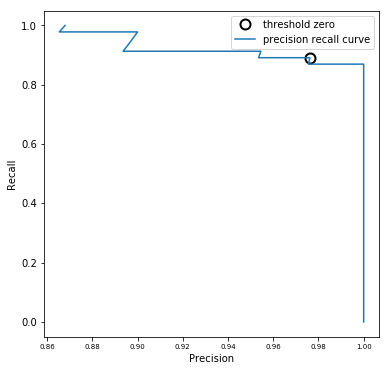

In [100]:
param_grid_linearSVC = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid_linearSVC))

grid_search_linearSVC_100 = GridSearchCV(LinearSVC(),param_grid_linearSVC,cv=5,return_train_score=True, n_jobs=-1)
grid_search_linearSVC_100.fit(X_c_train_scaled, np.ravel(y_c_train,order='C'))
pred_grid_search=grid_search_linearSVC_100.predict(X_c_test_scaled)

print("Best parameters: {}".format(grid_search_linearSVC_100.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_linearSVC_100.best_score_))
print("Best Estimator:".format(grid_search_linearSVC_100.best_estimator_))

print("f1 score Linear SVM: {:.2f}".format(f1_score(y_c_test, pred_grid_search)))

conf_matrix=confusion_matrix(y_c_test,pred_grid_search)
print("Confusion matrix:\n{}".format(conf_matrix))
print("Training Score: {:.2f}".format((grid_search_linearSVC_100.score(X_c_train_scaled, y_c_train))))
print("Testing Score: {:.2f}".format((grid_search_linearSVC_100.score(X_c_test_scaled, y_c_test))))

print(classification_report(y_c_test, pred_grid_search, target_names=["not Fradulent", "Fradulent"]))
print("Best estimator: {}".format(grid_search_linearSVC_100.best_estimator_))

precision, recall, thresholds = precision_recall_curve(y_c_test, grid_search_linearSVC_100.decision_function(X_c_test_scaled))

close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

ap_linear_svm = average_precision_score(y_c_test, grid_search_linearSVC_100.best_estimator_.decision_function(X_c_test_scaled))
print("Average precision of KNN : {:.3f}".format(ap_linear_svm))

linear_svm_auc = roc_auc_score(y_c_test, grid_search_linearSVC_100.best_estimator_.decision_function(X_c_test_scaled))
print("AUC for Linear Support Vector Machine: {:.3f}".format(linear_svm_auc))

In [101]:
lsvc_c_best_param = format(grid_search_linearSVC_100.best_params_)
lsvc_c_cv_score = round(grid_search_linearSVC_100.best_score_,2)
lsvc_c_train_score = round((grid_search_linearSVC_100.score(X_c_train_scaled, y_c_train)),2)
lsvc_c_test_score= round((grid_search_linearSVC_100.score(X_c_test_scaled, y_c_test)),2)

f = open('result-audit_PCA_Classification.csv','a')
line = 'Linear SVM Classifier_PCA,' + str(lsvc_c_best_param)+ ',' + str(lsvc_c_train_score) + ',' + str(lsvc_c_test_score) + ','+ str(lsvc_c_cv_score) +'\n' 
f.write(line)
f.close()

#### Linear SVC Using GridSearchCV after PCA (95% variance)

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100]}
Best parameters: {'C': 100}
Best cross-validation score: 0.96
Best Estimator:
f1 score Linear SVM: 0.95
Confusion matrix:
[[74  2]
 [ 3 43]]
Training Score: 0.97
Testing Score: 0.96
               precision    recall  f1-score   support

not Fradulent       0.96      0.97      0.97        76
    Fradulent       0.96      0.93      0.95        46

  avg / total       0.96      0.96      0.96       122

Best estimator: LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
Average precision of KNN : 0.990
AUC for Linear Support Vector Machine: 0.993


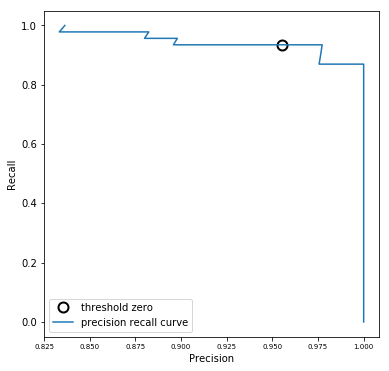

In [102]:
param_grid_linearSVC = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid_linearSVC))

grid_search_linearSVC_95 = GridSearchCV(LinearSVC(),param_grid_linearSVC,cv=5,return_train_score=True, n_jobs=-1)
grid_search_linearSVC_95.fit(X_c_train_scaled_95, np.ravel(y_c_train,order='C'))
pred_grid_search=grid_search_linearSVC_95.predict(X_c_test_scaled_95)

print("Best parameters: {}".format(grid_search_linearSVC_95.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_linearSVC_95.best_score_))
print("Best Estimator:".format(grid_search_linearSVC_95.best_estimator_))

print("f1 score Linear SVM: {:.2f}".format(f1_score(y_c_test, pred_grid_search)))

conf_matrix=confusion_matrix(y_c_test,pred_grid_search)
print("Confusion matrix:\n{}".format(conf_matrix))
print("Training Score: {:.2f}".format((grid_search_linearSVC_95.score(X_c_train_scaled_95, y_c_train))))
print("Testing Score: {:.2f}".format((grid_search_linearSVC_95.score(X_c_test_scaled_95, y_c_test))))

print(classification_report(y_c_test, pred_grid_search, target_names=["not Fradulent", "Fradulent"]))
print("Best estimator: {}".format(grid_search_linearSVC_95.best_estimator_))

precision, recall, thresholds = precision_recall_curve(y_c_test, grid_search_linearSVC_95.decision_function(X_c_test_scaled_95))

close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

ap_linear_svm = average_precision_score(y_c_test, grid_search_linearSVC_95.best_estimator_.decision_function(X_c_test_scaled_95))
print("Average precision of KNN : {:.3f}".format(ap_linear_svm))

linear_svm_auc = roc_auc_score(y_c_test, grid_search_linearSVC_95.best_estimator_.decision_function(X_c_test_scaled_95))
print("AUC for Linear Support Vector Machine: {:.3f}".format(linear_svm_auc))

In [103]:
lsvm_c_best_param_95 = format(grid_search_linearSVC_95.best_params_)
lsvm_c_cv_score_95 = round(grid_search_linearSVC_95.best_score_,2)
lsvm_c_train_score_95 = round((grid_search_linearSVC_95.score(X_c_train_scaled_95, y_c_train)),2)
lsvm_c_test_score_95 = round((grid_search_linearSVC_95.score(X_c_test_scaled_95, y_c_test)),2)

f = open('result-audit_PCA_Classification.csv','a')
line = 'Linear SVM Classifier_PCA_95,' + str(lsvm_c_best_param_95)+ ',' + str(lsvm_c_train_score_95) + ',' + str(lsvm_c_test_score_95) + ' ,' + str(lsvm_c_cv_score_95) +'\n' 
f.write(line)
f.close()

### Kernalized SVM Classifier using Grid search after PCA (100% variance)

``Kernel RBF``

Parameter grid:
{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.97
f1 score Linear SVM: 0.93
Confusion matrix:
[[76  0]
 [ 6 40]]
Training Score: 0.98
Testing Score: 0.95
               precision    recall  f1-score   support

not Fradulent       0.93      1.00      0.96        76
    Fradulent       1.00      0.87      0.93        46

  avg / total       0.95      0.95      0.95       122

Best estimator: SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Average precision of KNN : 0.990
AUC for Linear Support Vector Machine: 0.993


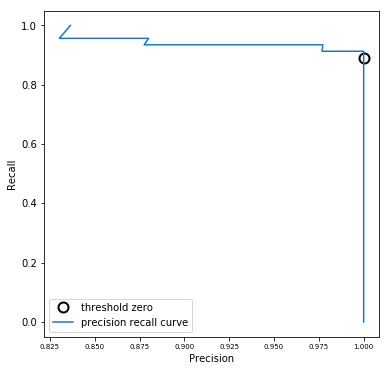

In [104]:
param_grid_RBF={'kernel':['rbf'], 
            'C':[0.001, 0.01, 0.1, 1, 10, 100],
           'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid_RBF))


grid_search_RBF_c_100 = GridSearchCV(SVC(),param_grid_RBF,cv=5,return_train_score=True, n_jobs=-1)
grid_search_RBF_c_100.fit(X_c_train_scaled, np.ravel(y_c_train,order='C'))
pred_grid_search=grid_search_RBF_c_100.predict(X_c_test_scaled)

print("Best parameters: {}".format(grid_search_RBF_c_100.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_RBF_c_100.best_score_))

print("f1 score Linear SVM: {:.2f}".format(f1_score(y_c_test, pred_grid_search)))

conf_matrix=confusion_matrix(y_c_test,pred_grid_search)
print("Confusion matrix:\n{}".format(conf_matrix))
print("Training Score: {:.2f}".format((grid_search_RBF_c_100.score(X_c_train_scaled, y_c_train))))
print("Testing Score: {:.2f}".format((grid_search_RBF_c_100.score(X_c_test_scaled, y_c_test))))

print(classification_report(y_c_test, pred_grid_search, target_names=["not Fradulent", "Fradulent"]))
print("Best estimator: {}".format(grid_search_RBF_c_100.best_estimator_))

precision, recall, thresholds = precision_recall_curve(y_c_test, grid_search_RBF_c_100.decision_function(X_c_test_scaled))

close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

ap_linear_svm = average_precision_score(y_c_test, grid_search_RBF_c_100.best_estimator_.decision_function(X_c_test_scaled))
print("Average precision of KNN : {:.3f}".format(ap_linear_svm))

linear_svm_auc = roc_auc_score(y_c_test, grid_search_RBF_c_100.best_estimator_.decision_function(X_c_test_scaled))
print("AUC for Linear Support Vector Machine: {:.3f}".format(linear_svm_auc))

In [105]:
svm_rbf_c_best_param = format(grid_search_RBF_c_100.best_params_)
svm_rbf_c_best_param=svm_rbf_c_best_param.replace(',', '')
svm_rbf_c_cv_score = round(grid_search_RBF_c_100.best_score_,2)
svm_rbf_c_train_score =round((grid_search_RBF_c_100.score(X_c_train_scaled, y_c_train)),2)
svm_rbf_c_test_score= round((grid_search_RBF_c_100.score(X_c_test_scaled, y_c_test)),2)

f = open('result-audit_PCA_Classification.csv','a')
line = 'SVM RBF Classifier_PCA,' + str(svm_rbf_c_best_param)+ ',' + str(svm_rbf_c_train_score) + ',' + str(svm_rbf_c_test_score) + ' ,'+ str(svm_rbf_c_cv_score) +'\n' 
f.write(line)
f.close()

### Kernalized SVM Classifier using Grid search after PCA  (95% Variance)

``Kernel RBF``

Parameter grid:
{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
Best parameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.97
Best Estimator:
f1 score Linear SVM: 0.95
Confusion matrix:
[[76  0]
 [ 4 42]]
Training Score: 0.97
Testing Score: 0.97
               precision    recall  f1-score   support

not Fradulent       0.95      1.00      0.97        76
    Fradulent       1.00      0.91      0.95        46

  avg / total       0.97      0.97      0.97       122

Best estimator: SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Average precision of KNN : 0.992
AUC for Linear Support Vector Machine: 0.995


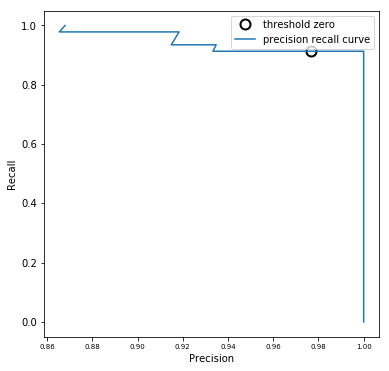

In [106]:
param_grid_RBF={'kernel':['rbf'], 
            'C':[0.001, 0.01, 0.1, 1, 10, 100],
           'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid_RBF))

grid_search_RBF_c_95 = GridSearchCV(SVC(),param_grid_RBF,cv=5, return_train_score=True, n_jobs=-1)
grid_search_RBF_c_95.fit(X_c_train_scaled_95, np.ravel(y_c_train,order='C'))
pred_grid_search=grid_search_RBF_c_95.predict(X_c_test_scaled_95)

print("Best parameters: {}".format(grid_search_RBF_c_95.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_RBF_c_95.best_score_))
print("Best Estimator:".format(grid_search_RBF_c_95.best_estimator_))

print("f1 score Linear SVM: {:.2f}".format(f1_score(y_c_test, pred_grid_search)))

conf_matrix=confusion_matrix(y_c_test,pred_grid_search)
print("Confusion matrix:\n{}".format(conf_matrix))
print("Training Score: {:.2f}".format((grid_search_RBF_c_95.score(X_c_train_scaled_95, y_c_train))))
print("Testing Score: {:.2f}".format((grid_search_RBF_c_95.score(X_c_test_scaled_95, y_c_test))))

print(classification_report(y_c_test, pred_grid_search, target_names=["not Fradulent", "Fradulent"]))
print("Best estimator: {}".format(grid_search_RBF_c_95.best_estimator_))

precision, recall, thresholds = precision_recall_curve(y_c_test, grid_search_RBF_c_95.decision_function(X_c_test_scaled_95))

close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

ap_linear_svm = average_precision_score(y_c_test, grid_search_RBF_c_95.best_estimator_.decision_function(X_c_test_scaled_95))
print("Average precision of KNN : {:.3f}".format(ap_linear_svm))

linear_svm_auc = roc_auc_score(y_c_test, grid_search_RBF_c_95.best_estimator_.decision_function(X_c_test_scaled_95))
print("AUC for Linear Support Vector Machine: {:.3f}".format(linear_svm_auc))

In [107]:
svm_c_best_param_95 = format(grid_search_RBF_c_95.best_params_)
svm_c_best_param_95=svm_c_best_param_95.replace(',', '')
svm_c_cv_score_95 = round(grid_search_RBF_c_95.best_score_,2)
svm_c_train_score_95 = round((grid_search_RBF_c_95.score(X_c_train_scaled_95, y_c_train)),2)
svm_c_test_score_95 = round((grid_search_RBF_c_95.score(X_c_test_scaled_95, y_c_test)),2)

f = open('result-audit_PCA_Classification.csv','a')
line = 'SVM Classifier_PCA_95,' + str(svm_c_best_param_95)+ ',' + str(svm_c_train_score_95) + ',' + str(svm_c_test_score_95) + ',' + str(svm_c_cv_score_95) +'\n' 
f.write(line)
f.close()

### Kernalized SVM Classifier using Grid search after PCA (100% variance)

``Kernel poly``

Parameter grid:
{'kernel': ['poly'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
Best parameters: {'C': 0.001, 'gamma': 100, 'kernel': 'poly'}
Best cross-validation score: 0.97
Best Estimator:
f1 score Linear SVM: 0.90
Confusion matrix:
[[71  5]
 [ 4 42]]
Training Score: 1.00
Testing Score: 0.93
               precision    recall  f1-score   support

not Fradulent       0.95      0.93      0.94        76
    Fradulent       0.89      0.91      0.90        46

  avg / total       0.93      0.93      0.93       122

Best estimator: SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Average precision of KNN : 0.947
AUC for Linear Support Vector Machine: 0.969


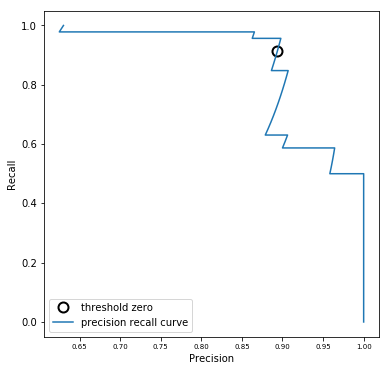

In [108]:
param_grid_poly ={'kernel':['poly'], 
            'C':[0.001, 0.01, 0.1, 1, 10, 100],
           'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid_poly))


grid_search_poly_c_100 = GridSearchCV(SVC(),param_grid_poly,cv=5,return_train_score=True, n_jobs=-1)
grid_search_poly_c_100.fit(X_c_train_scaled, np.ravel(y_c_train,order='C'))
pred_grid_search=grid_search_poly_c_100.predict(X_c_test_scaled)

print("Best parameters: {}".format(grid_search_poly_c_100.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_poly_c_100.best_score_))
print("Best Estimator:".format(grid_search_poly_c_100.best_estimator_))

print("f1 score Linear SVM: {:.2f}".format(f1_score(y_c_test, pred_grid_search)))

conf_matrix=confusion_matrix(y_c_test,pred_grid_search)
print("Confusion matrix:\n{}".format(conf_matrix))
print("Training Score: {:.2f}".format((grid_search_poly_c_100.score(X_c_train_scaled, y_c_train))))
print("Testing Score: {:.2f}".format((grid_search_poly_c_100.score(X_c_test_scaled, y_c_test))))

print(classification_report(y_c_test, pred_grid_search, target_names=["not Fradulent", "Fradulent"]))
print("Best estimator: {}".format(grid_search_poly_c_100.best_estimator_))

precision, recall, thresholds = precision_recall_curve(y_c_test, grid_search_poly_c_100.decision_function(X_c_test_scaled))

close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

ap_linear_svm = average_precision_score(y_c_test, grid_search_poly_c_100.best_estimator_.decision_function(X_c_test_scaled))
print("Average precision of KNN : {:.3f}".format(ap_linear_svm))

linear_svm_auc = roc_auc_score(y_c_test, grid_search_poly_c_100.best_estimator_.decision_function(X_c_test_scaled))
print("AUC for Linear Support Vector Machine: {:.3f}".format(linear_svm_auc))

In [109]:
svm_poly_c_best_param = format(grid_search_poly_c_100.best_params_)
svm_poly_c_best_param=svm_poly_c_best_param.replace(',', '')
svm_poly_c_cv_score = round(grid_search_poly_c_100.best_score_,2)
svm_poly_c_train_score =round((grid_search_poly_c_100.score(X_c_train_scaled, y_c_train)),2)
svm_poly_c_test_score= round((grid_search_poly_c_100.score(X_c_test_scaled, y_c_test)),2)

f = open('result-audit_PCA_Classification.csv','a')
line = 'SVM Poly Classifier_PCA,' + str(svm_poly_c_best_param)+ ',' + str(svm_poly_c_train_score) + ',' + str(svm_poly_c_test_score) + ' ,' + str(svm_poly_c_cv_score) +'\n' 
f.write(line)
f.close()

### Kernalized SVM Classifier using Grid search after PCA  (95% Variance)

``Kernel POLY``

Parameter grid:
{'kernel': ['poly'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
Best parameters: {'C': 1, 'gamma': 100, 'kernel': 'poly'}
Best cross-validation score: 0.96
Best Estimator:
f1 score Linear SVM: 0.92
Confusion matrix:
[[74  2]
 [ 5 41]]
Training Score: 1.00
Testing Score: 0.94
               precision    recall  f1-score   support

not Fradulent       0.94      0.97      0.95        76
    Fradulent       0.95      0.89      0.92        46

  avg / total       0.94      0.94      0.94       122

Best estimator: SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Average precision of KNN : 0.979
AUC for Linear Support Vector Machine: 0.986


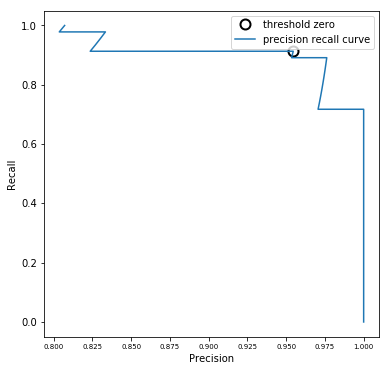

In [110]:
param_grid_poly={'kernel':['poly'], 
            'C':[0.001, 0.01, 0.1, 1, 10, 100],
           'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid_poly))

grid_search_poly_c_95 = GridSearchCV(SVC(),param_grid_poly,cv=5, return_train_score=True, n_jobs=-1)
grid_search_poly_c_95.fit(X_c_train_scaled_95, np.ravel(y_c_train,order='C'))
pred_grid_search=grid_search_poly_c_95.predict(X_c_test_scaled_95)

print("Best parameters: {}".format(grid_search_poly_c_95.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_poly_c_95.best_score_))
print("Best Estimator:".format(grid_search_poly_c_95.best_estimator_))

print("f1 score Linear SVM: {:.2f}".format(f1_score(y_c_test, pred_grid_search)))

conf_matrix=confusion_matrix(y_c_test,pred_grid_search)
print("Confusion matrix:\n{}".format(conf_matrix))
print("Training Score: {:.2f}".format((grid_search_poly_c_95.score(X_c_train_scaled_95, y_c_train))))
print("Testing Score: {:.2f}".format((grid_search_poly_c_95.score(X_c_test_scaled_95, y_c_test))))

print(classification_report(y_c_test, pred_grid_search, target_names=["not Fradulent", "Fradulent"]))
print("Best estimator: {}".format(grid_search_poly_c_95.best_estimator_))

precision, recall, thresholds = precision_recall_curve(y_c_test, grid_search_poly_c_95.decision_function(X_c_test_scaled_95))

close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

ap_linear_svm = average_precision_score(y_c_test, grid_search_poly_c_95.best_estimator_.decision_function(X_c_test_scaled_95))
print("Average precision of KNN : {:.3f}".format(ap_linear_svm))

linear_svm_auc = roc_auc_score(y_c_test, grid_search_poly_c_95.best_estimator_.decision_function(X_c_test_scaled_95))
print("AUC for Linear Support Vector Machine: {:.3f}".format(linear_svm_auc))

In [111]:
svm_poly_c_best_param_95 = format(grid_search_poly_c_95.best_params_)
svm_poly_c_best_param_95=svm_poly_c_best_param_95.replace(',', '')
svm_poly_c_cv_score_95 = round(grid_search_poly_c_95.best_score_,2)
svm_poly_c_train_score_95 = round((grid_search_poly_c_95.score(X_c_train_scaled_95, y_c_train)),2)
svm_poly_c_test_score_95 = round((grid_search_poly_c_95.score(X_c_test_scaled_95, y_c_test)),2)

f = open('result-audit_PCA_Classification.csv','a')
line = 'SVM Poly Classifier_PCA_95,' + str(svm_poly_c_best_param_95)+ ',' + str(svm_poly_c_train_score_95) + ',' + str(svm_poly_c_test_score_95) + ' ,'+ str(svm_poly_c_cv_score_95) +'\n' 
f.write(line)
f.close()

### Decision Tree Classifier using Grid search after PCA (100% variance)

In [112]:
from sklearn import tree

import graphviz
import os

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [113]:
param_grid_tree={'max_depth':[4,5,6]}
print("Parameter grid:\n{}".format(param_grid_tree))
grid_search_dtree_100 = GridSearchCV(DecisionTreeClassifier(),param_grid_tree,cv=5,return_train_score=True)

grid_search_dtree_100.fit(X_c_train_scaled, np.ravel(y_c_train,order='C'))
pred_grid_search=grid_search_dtree_100.predict(X_c_test_scaled)

print("Best parameters: {}".format(grid_search_dtree_100.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_dtree_100.best_score_))
print("Best Estimator:".format(grid_search_dtree_100.best_estimator_))

print("f1 score Decision Tree: {:.2f}".format(f1_score(y_c_test, pred_grid_search)))
conf_matrix=confusion_matrix(y_c_test,pred_grid_search)
print("Confusion matrix:\n{}".format(conf_matrix))

print("Training Score: {:.2f}".format((grid_search_dtree_100.score(X_c_train_scaled, y_c_train))))
print("Testing Score: {:.2f}".format((grid_search_dtree_100.score(X_c_test_scaled, y_c_test))))
print(classification_report(y_c_test, pred_grid_search, target_names=["not Fradulent", "Fradulent"]))
print("Best estimator: {}".format(grid_search_dtree_100.best_estimator_))

ap_dt = average_precision_score(y_c_test, grid_search_dtree_100.best_estimator_.predict_proba(X_c_test_scaled)[:, 1])
print("Average precision of Decision Tree : {:.3f}".format(ap_dt))

dt_auc = roc_auc_score(y_c_test, grid_search_dtree_100.best_estimator_.predict_proba(X_c_test_scaled)[:, 1])
print("AUC for Decision Tree: {:.3f}".format(dt_auc))

Parameter grid:
{'max_depth': [4, 5, 6]}
Best parameters: {'max_depth': 4}
Best cross-validation score: 0.96
Best Estimator:
f1 score Decision Tree: 0.96
Confusion matrix:
[[74  2]
 [ 2 44]]
Training Score: 0.99
Testing Score: 0.97
               precision    recall  f1-score   support

not Fradulent       0.97      0.97      0.97        76
    Fradulent       0.96      0.96      0.96        46

  avg / total       0.97      0.97      0.97       122

Best estimator: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Average precision of Decision Tree : 0.930
AUC for Decision Tree: 0.965


In [114]:
dt_c_best_param = format(grid_search_dtree_100.best_params_)
dt_c_cv_score = round(grid_search_dtree_100.best_score_,2)
dt_c_train_score = round((grid_search_dtree_100.score(X_c_train_scaled, y_c_train)),2)
dt_c_test_score= round((grid_search_dtree_100.score(X_c_test_scaled, y_c_test)),2)

f = open('result-audit_PCA_Classification.csv','a')
line = 'Decision Tree Classifier_PCA,' + str(dt_c_best_param)+ ',' + str(dt_c_train_score) + ',' + str(dt_c_test_score) +' ,'+ str(dt_c_cv_score) +'\n' 
f.write(line)
f.close()

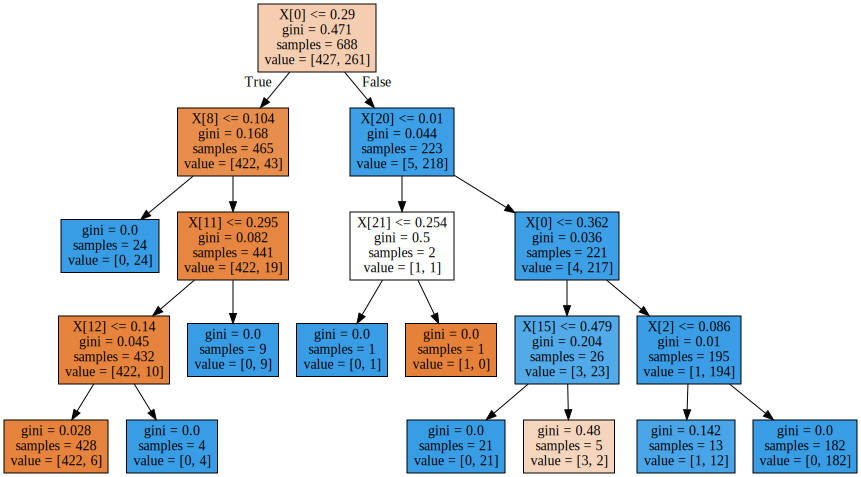

In [115]:
dtree_100 = DecisionTreeClassifier(max_depth=4)
dtree_100.fit(X_c_train_scaled, y_c_train)

dot_data_100= tree.export_graphviz(dtree_100,out_file =None, filled = True)
graph = graphviz.Source(dot_data_100)
graph

### Decision Tree Classifier using Grid search after PCA (95% variance)

In [116]:
param_grid_dtree={'max_depth':[4,5,6]}
print("Parameter grid:\n{}".format(param_grid_dtree))
grid_search_dtree_95 = GridSearchCV(DecisionTreeClassifier(),param_grid_dtree,cv=5,return_train_score=True)

grid_search_dtree_95.fit(X_c_train_scaled_95, np.ravel(y_c_train,order='C'))
pred_grid_search=grid_search_dtree_95.predict(X_c_test_scaled_95)

print("Best parameters: {}".format(grid_search_dtree_95.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_dtree_95.best_score_))
print("Best Estimator:".format(grid_search_dtree_95.best_estimator_))

print("f1 score Decision Tree: {:.2f}".format(f1_score(y_c_test, pred_grid_search)))
conf_matrix=confusion_matrix(y_c_test,pred_grid_search)
print("Confusion matrix:\n{}".format(conf_matrix))

print("Training Score: {:.2f}".format((grid_search_dtree_95.score(X_c_train_scaled_95, y_c_train))))
print("Testing Score: {:.2f}".format((grid_search_dtree_95.score(X_c_test_scaled_95, y_c_test))))
print(classification_report(y_c_test, pred_grid_search, target_names=["not Fradulent", "Fradulent"]))
print("Best estimator: {}".format(grid_search_dtree_95.best_estimator_))

ap_dt = average_precision_score(y_c_test, grid_search_dtree_95.best_estimator_.predict_proba(X_c_test_scaled_95)[:, 1])
print("Average precision of Decision Tree : {:.3f}".format(ap_dt))

dt_auc = roc_auc_score(y_c_test, grid_search_dtree_95.best_estimator_.predict_proba(X_c_test_scaled_95)[:, 1])
print("AUC for Decision Tree: {:.3f}".format(dt_auc))

Parameter grid:
{'max_depth': [4, 5, 6]}
Best parameters: {'max_depth': 6}
Best cross-validation score: 0.96
Best Estimator:
f1 score Decision Tree: 0.95
Confusion matrix:
[[73  3]
 [ 2 44]]
Training Score: 0.99
Testing Score: 0.96
               precision    recall  f1-score   support

not Fradulent       0.97      0.96      0.97        76
    Fradulent       0.94      0.96      0.95        46

  avg / total       0.96      0.96      0.96       122

Best estimator: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Average precision of Decision Tree : 0.922
AUC for Decision Tree: 0.967


In [117]:
dt_c_best_param_95 = format(grid_search_dtree_95.best_params_)
dt_c_cv_score_95 = round(grid_search_dtree_95.best_score_,2)
dt_c_train_score_95 = round((grid_search_dtree_95.score(X_c_train_scaled_95, y_c_train)),2)
dt_c_test_score_95 = round((grid_search_dtree_95.score(X_c_test_scaled_95, y_c_test)),2)

f = open('result-audit_PCA_Classification.csv','a')
line = 'Decision Tree Classifier_PCA_95,' + str(dt_c_best_param_95)+ ',' + str(dt_c_train_score_95) + ',' + str(dt_c_test_score_95) + ' ,'+ str(dt_c_cv_score_95) +'\n' 
f.write(line)
f.close()

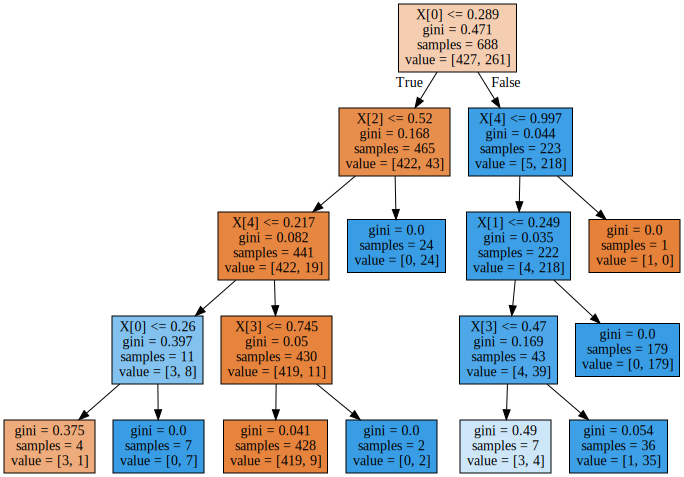

In [118]:
dtree = DecisionTreeClassifier(max_depth=4)
dtree.fit(X_c_train_scaled_95, y_c_train)

dot_data= tree.export_graphviz(dtree,out_file =None, filled = True)
graph = graphviz.Source(dot_data)
graph

# Deep Learning

### Deep Learning for Classification

In [124]:
#using grid search to find the optimum number of parameters fro epchos and batch size

#from tensorflow.keras.wrappers.sckit_learn import KerasClassifier

# Function to create model, required for KerasRegressor
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(12, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    #compile Model
    model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics =['accuracy'])
    return model

# fix random seed for reproducibility

seed = 7
numpy.random.seed(seed)

base_clf = KerasClassifier(build_fn=create_model, verbose = -1) #return_train_score=True

# grid search epochs, batch size and optimizer

grid_param = {'epochs':[50,100,150],'batch_size':[20,50,100]}
grid = GridSearchCV(estimator=base_clf, param_grid=grid_param)
grid_result = grid.fit(X_c_train, y_c_train)


#evaluate
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means_t = grid_result.cv_results_['mean_train_score']
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

#for mean_t,mean, stdev, param in zip(means_t,means, stds, params):
#	print("Train Score: %f, Test Score: %f, Standard Test Score: %f, with: Parameters: %r" % (mean_t, mean, stdev, param))

Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50
Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/5

Epoch 48/150
Epoch 49/150
Epoch 50/150
Epoch 51/150
Epoch 52/150
Epoch 53/150
Epoch 54/150
Epoch 55/150
Epoch 56/150
Epoch 57/150
Epoch 58/150
Epoch 59/150
Epoch 60/150
Epoch 61/150
Epoch 62/150
Epoch 63/150
Epoch 64/150
Epoch 65/150
Epoch 66/150
Epoch 67/150
Epoch 68/150
Epoch 69/150
Epoch 70/150
Epoch 71/150
Epoch 72/150
Epoch 73/150
Epoch 74/150
Epoch 75/150
Epoch 76/150
Epoch 77/150
Epoch 78/150
Epoch 79/150
Epoch 80/150
Epoch 81/150
Epoch 82/150
Epoch 83/150
Epoch 84/150
Epoch 85/150
Epoch 86/150
Epoch 87/150
Epoch 88/150
Epoch 89/150
Epoch 90/150
Epoch 91/150
Epoch 92/150
Epoch 93/150
Epoch 94/150
Epoch 95/150
Epoch 96/150
Epoch 97/150
Epoch 98/150
Epoch 99/150
Epoch 100/150
Epoch 101/150
Epoch 102/150
Epoch 103/150
Epoch 104/150
Epoch 105/150
Epoch 106/150
Epoch 107/150
Epoch 108/150
Epoch 109/150
Epoch 110/150
Epoch 111/150
Epoch 112/150
Epoch 113/150
Epoch 114/150
Epoch 115/150
Epoch 116/150
Epoch 117/150
Epoch 118/150
Epoch 119/150
Epoch 120/150
Epoch 121/150
Epoch 122/150
Ep

Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78/100
Epoch 79/100
Epoch 80/100
Epoch 81/100
Epoch 82/100
Epoch 83/100
Epoch 84/100
Epoch 85/100
Epoch 86/100
Epoch 87/100
Epoch 88/100
Epoch 89/100
Epoch 90/100
Epoch 91/100
Epoch 92/100
Epoch 93/100
Epoch 94/100
Epoch 95/100
Epoch 96/100
Epoch 97/100
Epoch 98/100
Epoch 99/100
Epoch 100/100
Epoch 1/150
Epoch 2/150
Epoch 3/150
Epoch 4/150
Epoch 5/150
Epoch 6/150
Epoch 7/150
Epoch 8/150
Epoch 9/150
Epoch 10/150
Epoch 11/150
Epoch 12/150
Epoch 13/150
Epoch 14/150
Epoch 15/150
Epoch 16/150
Epoch 1

Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/10

Epoch 1/150
Epoch 2/150
Epoch 3/150
Epoch 4/150
Epoch 5/150
Epoch 6/150
Epoch 7/150
Epoch 8/150
Epoch 9/150
Epoch 10/150
Epoch 11/150
Epoch 12/150
Epoch 13/150
Epoch 14/150
Epoch 15/150
Epoch 16/150
Epoch 17/150
Epoch 18/150
Epoch 19/150
Epoch 20/150
Epoch 21/150
Epoch 22/150
Epoch 23/150
Epoch 24/150
Epoch 25/150
Epoch 26/150
Epoch 27/150
Epoch 28/150
Epoch 29/150
Epoch 30/150
Epoch 31/150
Epoch 32/150
Epoch 33/150
Epoch 34/150
Epoch 35/150
Epoch 36/150
Epoch 37/150
Epoch 38/150
Epoch 39/150
Epoch 40/150
Epoch 41/150
Epoch 42/150
Epoch 43/150
Epoch 44/150
Epoch 45/150
Epoch 46/150
Epoch 47/150
Epoch 48/150
Epoch 49/150
Epoch 50/150
Epoch 51/150
Epoch 52/150
Epoch 53/150
Epoch 54/150
Epoch 55/150
Epoch 56/150
Epoch 57/150
Epoch 58/150
Epoch 59/150
Epoch 60/150
Epoch 61/150
Epoch 62/150
Epoch 63/150
Epoch 64/150
Epoch 65/150
Epoch 66/150
Epoch 67/150
Epoch 68/150
Epoch 69/150
Epoch 70/150
Epoch 71/150
Epoch 72/150
Epoch 73/150
Epoch 74/150
Epoch 75/150
Epoch 76/150
Epoch 77/150
Epoch 78

C:\Users\mishr\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


#### Deep Learning Regression and Classification Results

In [125]:
result_classi = pd.DataFrame(grid_result.cv_results_)
result_classi

C:\Users\mishr\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\mishr\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\mishr\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\mishr\Anaconda3\lib\site-packages\sklearn\utils\

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_batch_size,param_epochs,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,3.164116,0.699662,0.963663,0.977471,20,50,"{'batch_size': 20, 'epochs': 50}",8,0.969565,0.978166,0.973799,0.976035,0.947598,0.978214,0.246448,0.395042,0.011478,0.001016
1,5.916870,0.414624,0.968023,0.984012,20,100,"{'batch_size': 20, 'epochs': 100}",3,0.978261,0.984716,0.973799,0.986928,0.951965,0.980392,0.680781,0.005692,0.011488,0.002714
2,7.754113,0.568813,0.972384,0.984740,20,150,"{'batch_size': 20, 'epochs': 150}",1,0.978261,0.986900,0.982533,0.986928,0.956332,0.980392,0.325320,0.069444,0.011471,0.003074
3,2.897427,0.521206,0.965116,0.969478,50,50,"{'batch_size': 50, 'epochs': 50}",4,0.969565,0.971616,0.978166,0.965142,0.947598,0.971678,0.290840,0.024153,0.012863,0.003067
4,3.803547,0.591752,0.962209,0.979652,50,100,"{'batch_size': 50, 'epochs': 100}",9,0.969565,0.980349,0.973799,0.980392,0.943231,0.978214,0.294725,0.088877,0.013516,0.001017
5,5.397909,0.602403,0.963663,0.981106,50,150,"{'batch_size': 50, 'epochs': 150}",7,0.978261,0.982533,0.973799,0.982571,0.938865,0.978214,0.188062,0.027721,0.017610,0.002045
6,2.765821,0.625995,0.969477,0.968754,100,50,"{'batch_size': 100, 'epochs': 50}",2,0.973913,0.973799,0.978166,0.962963,0.956332,0.969499,0.220484,0.025678,0.009446,0.004455
7,3.597993,0.719574,0.963663,0.972383,100,100,"{'batch_size': 100, 'epochs': 100}",6,0.969565,0.971616,0.973799,0.971678,0.947598,0.973856,0.484465,0.061914,0.011478,0.001042
8,3.914985,0.733568,0.965116,0.979652,100,150,"{'batch_size': 100, 'epochs': 150}",4,0.969565,0.980349,0.973799,0.980392,0.951965,0.978214,0.149188,0.070259,0.009449,0.001017


# Results and Intrepations

#### Regression without PCA Results: Project Part 1

In [127]:
Regress_part1 ='Result_Audit_Regression.csv'

Regress_part1_df= pd.read_csv(Regress_part1)
Regress_part1_df

,Model name,Best Parameters,Train Score,Test Score,Best Cross Validation score
0,KNN Regressor,{'n_neighbors': 3},0.65,0.25,0.48
1,Ridge Regression,{'alpha': 1},0.89,0.39,0.46
2,Lasso Regression,{'alpha': 1},0.50,0.77,0.58
3,Linear_SVR,{'C': 100},0.41,0.91,0.64
4,SVR with RBF kernel,{'C': 100 'gamma': 0.1 'kernel': 'rbf'},0.44,0.89,0.72
5,Linear Regression,,0.93,0.36,0.36


#### Classification without PCA Results: Project Part 1

In [128]:
Classi_part1 ='Result_Audit_Classification.csv'

Classi_part1_df=pd.read_csv(Classi_part1)
Classi_part1_df

,Model name,Best Parameters,Train Score,Test Score,Best Cross-Validation score
0,KNN Classifier,{'n_neighbors': 3},0.98,0.95,0.96
1,Logistic Regression,{'C': 100 'penalty': 'l1'},0.99,0.99,0.98
2,Linear SVM Classifier,{'C': 100},0.98,0.98,0.98
3,SVM RBF Classifier,{'C': 100 'gamma': 0.1 'kernel': 'rbf'},0.98,0.98,0.97
4,SVM Poly Classifier,{'C': 0.1 'gamma': 10 'kernel': 'poly'},0.99,0.95,0.97
5,Decision Tree Classifier,{'max_depth': 4},1.00,0.99,1.00


#### Regression with PCA Results: Project part 2

In [134]:
Regress_part2 ='result-audit_PCA_Regression.csv'

Regress_part2_df=pd.read_csv(Regress_part2)
Regress_part2_df

,Model name,Best Parameters,Train Score,Test Score,Best Cross Validation score
0,KNN_PCA_95,{'n_neighbors': 19},0.28,0.34,4.600000e-01
1,Ridge_PCA_95,{'alpha': 10},0.22,0.29,3.300000e-01
2,Lasso_PCA,{'alpha': 0.001},0.93,0.38,3.500000e-01
3,Lasso_PCA_95,{'alpha': 1},0.10,0.21,2.600000e-01
4,Linear_SVR_PCA,{'C': 100},0.43,0.91,6.200000e-01
5,Linear_SVR_PCA_95,{'C': 100},0.16,0.45,3.900000e-01
6,SVR with RBF kernel PCA,{'C': 100 'gamma': 1 'kernel': 'rbf'},0.45,0.84,5.800000e-01
7,SVR with RBF kernel PCA_95,{'C': 100 'gamma': 1 'kernel': 'rbf'},0.29,0.30,4.800000e-01
8,SVR with poly kernel PCA,{'C': 100 'gamma': 1 'kernel': 'poly'},1.00,0.96,8.700000e-01
9,Linear Regression PCA,,0.93,0.38,-7.382110e+22


#### Classification with PCA Results: Project Part 2

In [136]:
Classi_part2 ='result-audit_PCA_Classification.csv'

Classi_part2_df=pd.read_csv(Classi_part2)
Classi_part2_df

,Model name,Best Parameters,Train Score,Test Score,Best Cross-Validation score
0,KNN Classifier_PCA,{'n_neighbors': 5},0.97,0.96,0.95
1,KNN_PCA_95,{'n_neighbors': 1},1.00,0.94,0.95
2,Logistic Regression_PCA,{'C': 100 'penalty': 'l1'},0.99,0.95,0.97
3,Logistic Regression_PCA_95,{'C': 10 'penalty': 'l2'},0.97,0.97,0.96
4,Linear SVM Classifier_PCA,{'C': 100},0.99,0.94,0.97
5,Linear SVM Classifier_PCA_95,{'C': 10},0.97,0.96,0.96
6,SVM RBF Classifier_PCA,{'C': 10 'gamma': 0.1 'kernel': 'rbf'},0.98,0.95,0.97
7,SVM Classifier_PCA_95,{'C': 100 'gamma': 0.1 'kernel': 'rbf'},0.97,0.97,0.97
8,SVM Poly Classifier_PCA,{'C': 0.001 'gamma': 100 'kernel': 'poly'},1.00,0.93,0.97
9,SVM Poly Classifier_PCA_95,{'C': 1 'gamma': 100 'kernel': 'poly'},1.00,0.94,0.96


# Interpretations

## Regression Interpretations

#### KNN Regression:	
                    Best Parameters 	Train Score 	Test Score 	Best Cross-Validation score
    PART 1 :       {'n_neighbors': 3} 	    0.65 	         0.25 	            0.48
    PART 2(PCA 100%) : {'n_neighbors': 5} 	0.48 	         0.28 	            0.43
    PART 2(PCA 95%) : {'n_neighbors': 19} 	0.28 	         0.34 	            0.46

KNN PCA is performing better. KNN wihtout PCA has very less number of n_neighbours due to which it is causing a overfitting 
problem and their is a big difference in the train and test score as compared to PCA 100%


#### Ridge Regression:	
                           Best Parameters 	Train Score 	Test Score 	Best Cross-Validation score
           PART 1 :   	{'alpha': 1} 			0.89 			0.39 				0.46
        PART 2(PCA 100%) :{'alpha': 1} 			0.76 			0.61 				0.47
        PART 2(PCA 95%) :{'alpha': 10} 			0.22 			0.29 				0.33

Ridge PCA is performing better. It gives a better Cross-Validation score and the difference in the Train and test score is less

#### Lasso Regression:	
                    Best Parameters 	Train Score 	Test Score 	Best Cross-Validation score
    PART 1 :       	{'alpha': 1} 			0.50			0.77 				0.58
    PART 2(PCA 100%) :{'alpha': 0.001} 		0.93 			0.38 				0.35
    PART 2(PCA 95%) : {'alpha': 1} 			0.10 			0.21 				0.26

Lasso without PCA is performing better. It gives a better Cross-Validation score and the difference in the Train and test score is less

#### Linear_SVR Regression:	
                        Best Parameters 	Train Score 	Test Score 	Best Cross-Validation score
        PART 1 :   	{'C': 100} 			 0.41 			0.91 				0.64
      PART 2(PCA 100%) :{'C': 100} 			0.43 			0.91 				0.62
      PART 2(PCA 95%) : {'C': 100} 			0.16			 0.45 				0.39

Both Linear_SVR models are giving similar results.. just the train score of model with PCA is a bit higher and cross validation score is a bit lower 

 
#### SVR with RBF kernel:	
                       Best Parameters 			Train Score 	Test Score 	Best Cross-Validation score
    PART 1 :  		{'C': 100, 'gamma': 0.1} 			0.44 			0.89 				0.72
    PART 2(PCA 100%) :{'C': 100, 'gamma': 0.1} 			0.45 			0.84 				0.58
    PART 2(PCA 95%)  :{'C': 100, 'gamma': 0.1} 			0.29 			0.30				 0.48

SVR with RBF kernel without PCA is performing better. It gives a better Cross-Validation score and the difference in the Train and test score is less

#### SVR with Poly kernel:	
                       Best Parameters 			Train Score 	Test Score 	Best Cross-Validation score
    PART 1 :  		{'C': 100, 'gamma': 0.1} 		0.00 			0.00 				0.00
    PART 2(PCA 100%) :{'C': 100, 'gamma': 1} 		  1.00			 0.96 				0.87
    PART 2(PCA 95%)  :{'C': 100, 'gamma': 0.1} 		0.29 			0.30				 0.48

SVR with poly kernel without PCA is performing better. It gives a better Cross-Validation score and the difference in the Train and test score is less

#### Linear Regression:	
                    Best Parameters 	Train Score 	Test Score 	Best Cross-Validation score
    PART 1 :       						0.93 			0.36 				0.36
    PART 2(PCA 100%) :					 0.93 			0.38 				0.73
    PART 2(PCA 95%)  :					 0.26 			0.31 				0.13

Linear Regression PCA is performing better. It gives a better Cross-Validation score and the difference in the Train and test score is less


## Classification Interpretations

#### KNN Classifier:	
                    Best Parameters 	Train Score 	Test Score 	Best Cross-Validation score
    PART 1 :       {'n_neighbors': 3} 	    0.98 	         0.95 	            0.96
    PART 2(PCA 100%) : {'n_neighbors': 5} 	0.97 	         0.96 	            0.95
    PART 2(PCA 95%)  : {'n_neighbors': 1} 	1.00 	         0.94 	            0.95

KNN PCA is performing better. KNN without PCA 


#### Logistic Regression:	
                         Best Parameters 		Train Score 	Test Score 	Best Cross-Validation score
    PART 1 :  		{'C': 100, 'penalty': l1} 		0.99			0.99 				0.98
    PART 2(PCA 100%) :{'C': 100, 'penalty': l1} 	   0.99 			0.95 				0.97
    PART 2(PCA 95%)  :{'C': 10, 'penalty': l2} 		0.97 			0.97				 0.96

Logistic Regression without PCA is performing better. It gives a better Cross-Validation score and there is no difference in the Train and test score.


#### Linear_SVM Clasifier:	
                        Best Parameters 	Train Score 	Test Score 	Best Cross-Validation score
        PART 1 :   	{'C': 100} 			 0.98 			0.98 				0.98
      PART 2(PCA 100%) :{'C': 100} 			0.99 			0.94 				0.97
      PART 2(PCA 95%) : {'C': 10} 			 0.97			 0.96 			    0.96

Linear_SVM Classifier with PCA is performing better. It gives a better Cross-Validation score and there is no difference in the Train and test score.

#### SVC with RBF kernel:	
                       Best Parameters 			Train Score 	Test Score 	Best Cross-Validation score
    PART 1 :  		{'C': 100, 'gamma': 0.1} 			0.98 			0.98 				0.97
    PART 2(PCA 100%) :{'C': 10, 'gamma': 0.1} 			 0.98 			0.95 				0.97
    PART 2(PCA 95%)  :{'C': 100, 'gamma': 0.1} 			0.97 			0.97				 0.97

SVR with RBF kernel without PCA is performing better. It gives a better Cross-Validation score and there is no difference in the train and test score

#### SVC with Poly kernel:	
                       Best Parameters 			Train Score 	Test Score 	Best Cross-Validation score
    PART 1 :  	{'C': 0.1, 'gamma': 10} 			   0.99 			0.95 				0.97
    PART 2(PCA 100%) :{'C': 0.001, 'gamma': 100} 		1.00			 0.96 				0.87
    PART 2(PCA 95%)  :{'C': 1, 'gamma': 100} 			1.00 			0.94				 0.96

SVR with poly kernel without PCA is performing better. It gives a better Cross-Validation score and the difference in the Train and test score is less

#### Decision Tree Classifier :	
                        Best Parameters 			Train Score 	Test Score 	Best Cross-Validation score
    PART 1 :  	{'max_depth': 4} 				    1.00 			0.99 				1.00
    PART 2(PCA 100%) :{'max_depth': 4} 			    0.99			0.95 				0.96
    PART 2(PCA 95%)  :{'max_depth': 4} 				0.98 			0.96				0.96

Decision Tree Classifier without PCA is performing better. It gives a better Cross-Validation score and the difference in the Train and test score is less
